# From Seoul to the World: Popularity, Audio Trends and Market in K-Pop

Overall Objective for the Project

The primary objective of this project is to analyze the global success of K-pop bands and their market strategies to provide actionable insights for a music producer aiming to enter the Korean music industry. By examining key factors such as artist popularity, track characteristics, chart performance, solo success, and market distribution, this analysis seeks to identify trends, opportunities, and strategies that can guide the producer in crafting competitive and globally appealing music while navigating the dynamic K-pop landscape.

Specific Goals

- Understand Global Popularity: Analyze which K-pop artists and tracks dominate global markets and the factors driving their success.
- Identify Chart-Friendly Features: Determine the audio and stylistic characteristics that contribute to high chart performance.
- Explore Solo and Group Dynamics: Evaluate how individual and collective efforts contribute to the broader success of K-pop bands.
- Market Insights: Highlight key markets 
- Strategic Recommendations: Provide tailored insights for the producer to create impactful tracks, align with global trends, and achieve sustainable success in the K-pop industry.

### Import Required Libraries and Modules

In [1]:
from google.cloud import bigquery
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client
import pandas as pd
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook"
%matplotlib inline 
from math import pi 


## Data Loading and Cleaning

In [2]:
# Load BigQuery credentials and initialize client 
credentials, project_id = load_credentials_from_file('/Users/thyneminhtetaungaung/Music Project All file /service_account.json')

client = Client(
    project=project_id,
    credentials=credentials
)

In [3]:
# Function to load data from BigQuery table
def load_data(table):
    # Query to fetch all records from the specified table
    query = f"SELECT * FROM `da26-python.music_data.{table}`"
    load_job = client.query(query)
    return load_job.to_dataframe()


In [4]:
# Function to load multiple data sources 
def load_and_merge_data():
    #Load all dataframes
    audio_features = load_data("audio_features")
    chart_positions = load_data("chart_positions")
    artists = load_data("artists")
    tracks = load_data("tracks")
    tracks_artists = load_data("tracks_artists_mapping")
    market_data = pd.read_csv("market2.csv")
    return audio_features, chart_positions, artists, tracks, tracks_artists, market_data

In [5]:
# Load and merge all data sources 
audio_features, chart_positions, artists, tracks, tracks_artists, market_data = load_and_merge_data()

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



In [6]:
# I tried to get market data from spotify API to use market analysis. 
# Checking the Market Data first since it was retrieved using the Spotify API.
market_data.info

<bound method DataFrame.info of        Unnamed: 0                track_id  \
0               0  5CMVGP24paZIukljDj0iWc   
1               1  25leEEaz1gIpp7o21Fqyjo   
2               2  1dtIaSlyrLI04sqYa8nLyN   
3               3  4PS1e8f2LvuTFgUs1Cn3ON   
4               4  5ASM6Qjiav2xPe7gRkQMsQ   
...           ...                     ...   
10778       10778  5sRczgK1xkskY6HICpEKHa   
10779       10779  21SiVKUZKwWmL5C64G3R3e   
10780       10780  4nQLt9m4p0fLUMOogvV6ZN   
10781       10781  4M7DbskLseolYL7rooP1SN   
10782       10782  2SMyu6hdDHWbLLXB76Oz4i   

                                        available_market  
0      AR,AU,AT,BE,BO,BR,BG,CA,CL,CO,CR,CY,CZ,DK,DO,D...  
1      AR,AU,AT,BE,BO,BR,BG,CA,CL,CO,CR,CY,CZ,DK,DO,D...  
2      AR,AU,AT,BE,BO,BR,BG,CA,CL,CO,CR,CY,CZ,DK,DO,D...  
3      AR,AU,AT,BE,BO,BR,BG,CA,CL,CO,CR,CY,CZ,DK,DO,D...  
4      AR,AU,AT,BE,BO,BR,BG,CA,CL,CO,CR,CY,CZ,DK,DO,D...  
...                                                  ...  
10778  AR,AU,A

#### I will only merge the data when necessary, rather than performing an overall merge.

### Data Cleaning

In [7]:
# checking null data (for all column)
audio_features.loc[audio_features.isnull().any(axis = 1)]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop NA for 7 rows from audio_features
audio_features.dropna(inplace = True)

In [9]:
# change data type from floats to int for three column - Key, Mode, Time-Signature
audio_features["key"]= audio_features["key"].astype(int)
audio_features["mode"]= audio_features["mode"].astype(int)
audio_features["time_signature"]= audio_features["time_signature"].astype(int)

In [10]:
#Cleaning Tracks file / Check info first 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [11]:
# artists data cleaning/ checking info first / nothing need to change 
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 103.3+ KB


# Exploratory Data Analysis (EDA)
Stakeholder: A music producer aiming to enter the Korean music industry. 

### 1. Global K-Pop Dominant Artists/ band by Popularity
### How has the popularity of dominant K-pop artists/bands evolved globally over the past decade?



to identify which Korean music bands dominate global charts based on their popularity metrics. This analysis will focus on ranking bands and providing actionable insights into their market impact.



In [12]:
# # Merge datasets to associate artists with their chart positions and popularity
artist_chart_data = (
    chart_positions
    .merge(tracks_artists, on='track_id')
    .merge(artists, on='artist_id')
)

### 1.1 Global Artist by Popularity and Followers

#### What are the global trends in artist popularity and social media follower growth over the past years?

In [13]:
# Sort artists by popularity in descending order and select relevant columns 
sorted_artists = artist_chart_data.sort_values(by='popularity', ascending=False)[['name', 'popularity', 'followers']]
# Remove duplicate artist names to avoid redundancy
unique_sorted_artists = sorted_artists.drop_duplicates(subset='name')
# Set the display options to show more rows
pd.set_option('display.max_rows', None)  # This will allow displaying all rows
pd.set_option('display.max_columns', None)

unique_sorted_artists.reset_index()



,index,name,popularity,followers
0,127217,Taylor Swift,100,123544806
1,23510,Drake,96,92537455
2,8979,The Weeknd,96,92598894
3,173693,Billie Eilish,96,100687015
4,67488,Bad Bunny,95,86231149
5,78791,Sabrina Carpenter,95,13599895
6,160836,Bruno Mars,94,60197201
7,48822,Travis Scott,94,33611357
8,170052,Kanye West,93,27515989
9,48227,Future,93,18868243


In [14]:
# Find the maximum and minimum popularity scores by global artist 
max_followers = unique_sorted_artists.followers.max()
min_followers = unique_sorted_artists.followers.min()

# Find the names of the artists with max and min popularity
max_fow_name = unique_sorted_artists.loc[unique_sorted_artists.followers == max_followers, 'name'].iloc[0]
min_fow_name = unique_sorted_artists.loc[unique_sorted_artists.followers == min_followers, 'name'].iloc[0]
# Find the maximum and minimum popularity scores
max_popularity = unique_sorted_artists.popularity.max()
min_popularity = unique_sorted_artists.popularity.min()

# Find the names of the artists with max and min popularity
max_pop_name = unique_sorted_artists.loc[unique_sorted_artists.popularity == max_popularity, 'name'].iloc[0]
min_pop_name = unique_sorted_artists.loc[unique_sorted_artists.popularity == min_popularity, 'name'].iloc[0]

# Print the results for followers
print(f'Max follower artist is {max_fow_name} and they have {max_followers} followers.')
print(f'Min follower artist is {min_fow_name} and they have {min_followers} followers.')

# Print the results for popularity
print(f'Max popularity artist is {max_pop_name} and they have a popularity score of {max_popularity}.')
print(f'Min popularity artist is {min_fow_name} and they have a popularity score of {min_popularity}.')


Max follower artist is Taylor Swift and they have 123544806 followers.
Min follower artist is Valentin and they have 5 followers.
Max popularity artist is Taylor Swift and they have a popularity score of 100.
Min popularity artist is Valentin and they have a popularity score of 0.


#### 1.1 Insights
There are 3100 artist/band from 0 to 100 popularity and 5 to 123544806 followers.
Max follower artist is Taylor Swift and they have 123544806 followers. Min follower artist is Valentin and they have 5 followers. Max popularity artist is Taylor Swift and they have a popularity score of 100. Min popularity artist is 2000s Karaoke Band and they have a popularity score of 0.

#### 1.2 Rank of Artist Count by Popularity
Which artists have a specific popularity score? How many artists share the same popularity score?

In [15]:
# Aggregating Artists by Popularity
# group artists by their popularity, count how many artists share the same popularity score, and concatenate their names. 

# Assuming artist_chart_data is your DataFrame/ Sort the data by popularity and select only relevant columns
sorted_artists = unique_sorted_artists[['name', 'popularity']]

# Group by popularity to count artists and concatenate their names
grouped_artists = sorted_artists.groupby('popularity').agg(
    artist_names=('name', lambda x: ', '.join(x.unique())),
    artist_count=('name', 'size')
).reset_index()

# Sort the data by popularity (descending)
grouped_artists = grouped_artists.sort_values(by='popularity', ascending=False)

# Add rank column based on popularity
grouped_artists['rank'] = grouped_artists['popularity'].rank(ascending=False, method='min')

# Display the grouped results
grouped_artists

,popularity,artist_names,artist_count,rank
97,100,Taylor Swift,1,1.0
96,96,"Drake, The Weeknd, Billie Eilish",3,2.0
95,95,"Bad Bunny, Sabrina Carpenter",2,3.0
94,94,"Bruno Mars, Travis Scott",2,4.0
93,93,"Kanye West, Future, Eminem, Peso Pluma",4,5.0
92,92,"Rihanna, Feid, Kendrick Lamar, Post Malone, KA...",10,6.0
91,91,"Justin Bieber, Morgan Wallen, Zach Bryan, Juni...",4,7.0
90,90,"SZA, Metro Boomin, Chappell Roan, Playboi Cart...",6,8.0
89,89,"Ed Sheeran, Natanael Cano, Fuerza Regida, Imag...",11,9.0
88,88,"Chris Brown, Luke Combs, Juice WRLD, J Balvin,...",12,10.0


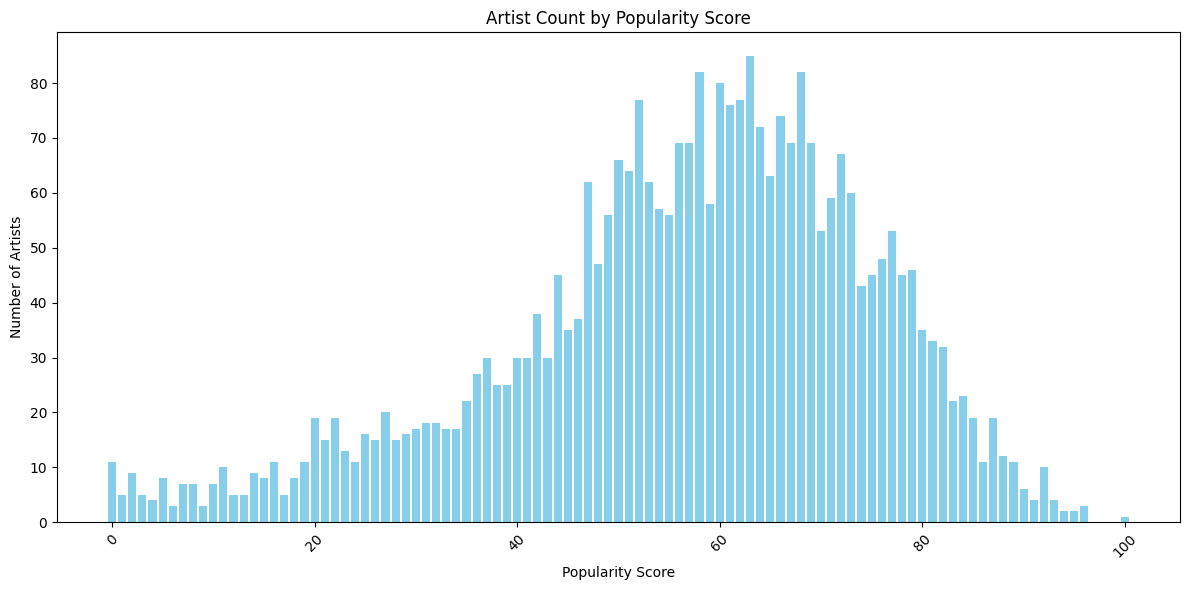

In [16]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped_artists['popularity'], grouped_artists['artist_count'], color='skyblue')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Artists')
plt.title('Artist Count by Popularity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insight 2
The chart shows a clear trend where the number of artists increases as the popularity score rises, peaking around 80. Very high popularity scores (close to 100) and very low scores (close to 0) are less common.

The majority of artists appear to have popularity scores in the middle range (50–80). Popularity scores around 60–80 represent a large cluster of artists, indicating this range is where most artists fall.

### 1.3 Top 35 Rank Artist/band by Popularity

####  Global K-pop Band/Artists in the top 35 of the popularity rank.
What are the relative ranks and popularity levels of K-pop artists/bands in the global top 35 artists by popularity?

In [17]:
grouped_artists.head(35).reset_index()

,index,popularity,artist_names,artist_count,rank
0,97,100,Taylor Swift,1,1.0
1,96,96,"Drake, The Weeknd, Billie Eilish",3,2.0
2,95,95,"Bad Bunny, Sabrina Carpenter",2,3.0
3,94,94,"Bruno Mars, Travis Scott",2,4.0
4,93,93,"Kanye West, Future, Eminem, Peso Pluma",4,5.0
5,92,92,"Rihanna, Feid, Kendrick Lamar, Post Malone, KA...",10,6.0
6,91,91,"Justin Bieber, Morgan Wallen, Zach Bryan, Juni...",4,7.0
7,90,90,"SZA, Metro Boomin, Chappell Roan, Playboi Cart...",6,8.0
8,89,89,"Ed Sheeran, Natanael Cano, Fuerza Regida, Imag...",11,9.0
9,88,88,"Chris Brown, Luke Combs, Juice WRLD, J Balvin,...",12,10.0


In [18]:
# filter the dataset for a predefined list of bands and its members
artists_to_check = ['BTS','Stray Kids','NewJeans','TWICE','BLACKPINK']

# Filter the DataFrame to show only the rows where 'name' is in the specified list
filtered_artists = unique_sorted_artists[unique_sorted_artists['name'].isin(artists_to_check)]

# # Display the filtered results
print(filtered_artists)


              name  popularity  followers
101973         BTS          87   76212947
119906  Stray Kids          85   17037770
86555     NewJeans          82    9211800
21159    BLACKPINK          81   51270653
43096        TWICE          79   20834278


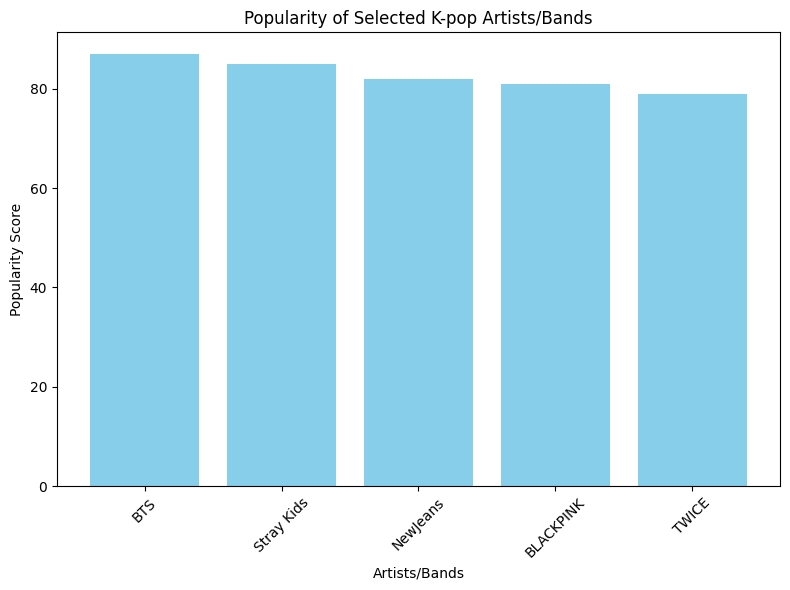

In [19]:
import matplotlib.pyplot as plt

# Extract data for plotting
artist_names = filtered_artists['name']
popularity_scores = filtered_artists['popularity']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(artist_names, popularity_scores, color='skyblue')
plt.xlabel('Artists/Bands')
plt.ylabel('Popularity Score')
plt.title('Popularity of Selected K-pop Artists/Bands')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

Insights 3

BTS has the highest popularity score at 87, ranking them as the most popular among the listed bands. Stray Kids, with a score of 85, follows closely behind. NewJeans, a newer group, scores 82, showcasing their rapid rise in popularity. BLACKPINK has a score of 81, solidifying their presence as global icons. TWICE, with a score of 79, rounds out the group, still maintaining significant global popularity.

Generally_ kpop artist involved globally popularity rank 35.

### How has the popularity of dominant K-pop artists/bands evolved globally over the past decade?
Popularity Metrics:

Among 3,100 artists and bands analyzed, popularity scores range from 0 to 100, and follower counts span from 5 to 123,544,806.
BTS holds the highest popularity score among K-pop artists at 87, followed by Stray Kids (85), NewJeans (82), BLACKPINK (81), and TWICE (79). These rankings reflect their dominance on global charts and platforms.
General Observations:

Popularity scores cluster between 50 and 80, indicating most artists fall within this range. Extremely high scores (near 100) and very low scores (close to 0) are relatively rare.
A significant rise in popularity of newer artists, such as NewJeans, highlights the dynamic nature of the K-pop industry.
Global Comparison:

The K-pop industry performs well globally, with many of its artists appearing in the top 35% of global popularity rankings.

##  2. Track Analysis of Global Kpop Band

 ### What are the key trends and characteristics of track durations for top K-pop bands, and how do these align with industry standards for global music consumption?


In [20]:
# List of artist names I want to check
korea_bands = ['BTS', 'Stray Kids', 'NewJeans', "TWICE", "BLACKPINK"]

# Step 1: Get the artist_id for the current artist
artist_data = artists.loc[artists['name'].isin(korea_bands)]  # Use `band` here instead of `artist_name
tracks_mapping = tracks_artists.merge(artist_data, on='artist_id') 


tracksbyid = tracks.merge(tracks_mapping, on='track_id', suffixes=('_track', '_artist'))
tracksbyid['duration_minutes'] = tracks['duration_ms'] / 60000
tracksbyid[['name_track', 'name_artist', 'duration_ms','duration_minutes']]

,name_track,name_artist,duration_ms,duration_minutes
0,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111
1,FAKE LOVE,BTS,242333,2.504433
2,DDU-DU DDU-DU,BLACKPINK,211350,3.112217
3,DNA,BTS,223122,3.202667
4,IDOL,BTS,260233,3.202667
5,Kiss and Make Up,BLACKPINK,189173,3.202667
6,Waste It On Me (feat. BTS),BTS,192536,3.0211
7,Kill This Love,BLACKPINK,191050,2.774217
8,Boy With Luv (feat. Halsey),BTS,229773,3.816667
9,Make It Right (feat. Lauv),BTS,226321,3.18


#### Insights

The average duration of the tracks in the dataset is approximately 3.66 minutes.

The majority of tracks from BTS and BLACKPINK fall within the 3.0 to 4.5-minute range, aligning with global trends for radio-friendly and stream-friendly music. This duration maximizes listener engagement and replayability, particularly on streaming platforms.

## 2.1 How many songs has each global K-pop band released?

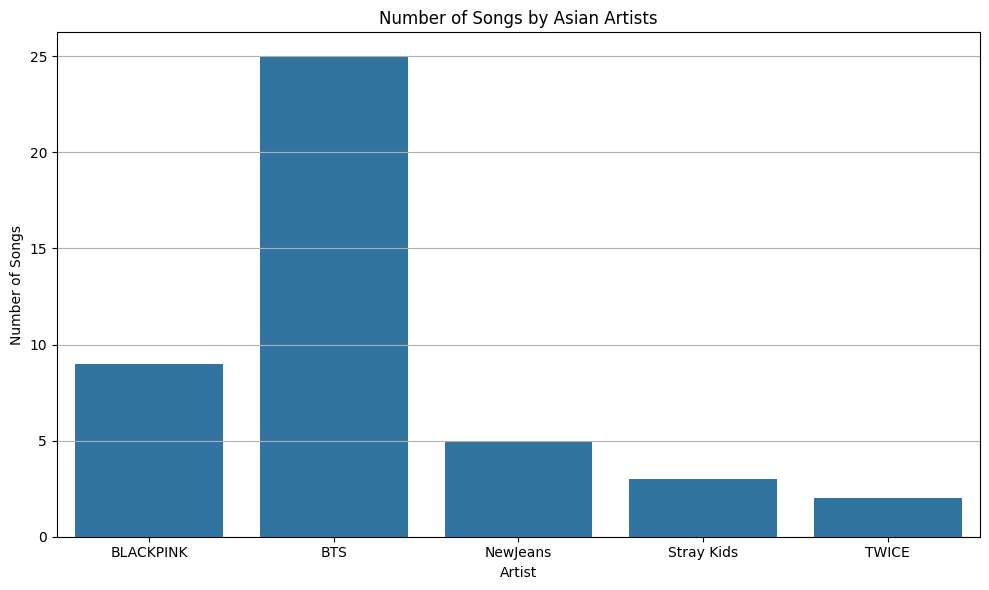

In [21]:
# Group by artist, concatenate all their tracks, and count the tracks
artist_tracks = (
    tracksbyid.groupby('name_artist')
    .agg(
        all_tracks=('name_track', ', '.join),  # Concatenate track names
        track_count=('name_track', 'count')   # Count the number of tracks
    )
    .reset_index()  # Reset index to convert back to a DataFrame
)

# Display the result
artist_tracks

# Step 3: Visualization - Number of Songs and Chart Performance
# Bar chart for number of songs
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_tracks, x='name_artist', y='track_count')
plt.title('Number of Songs by Asian Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

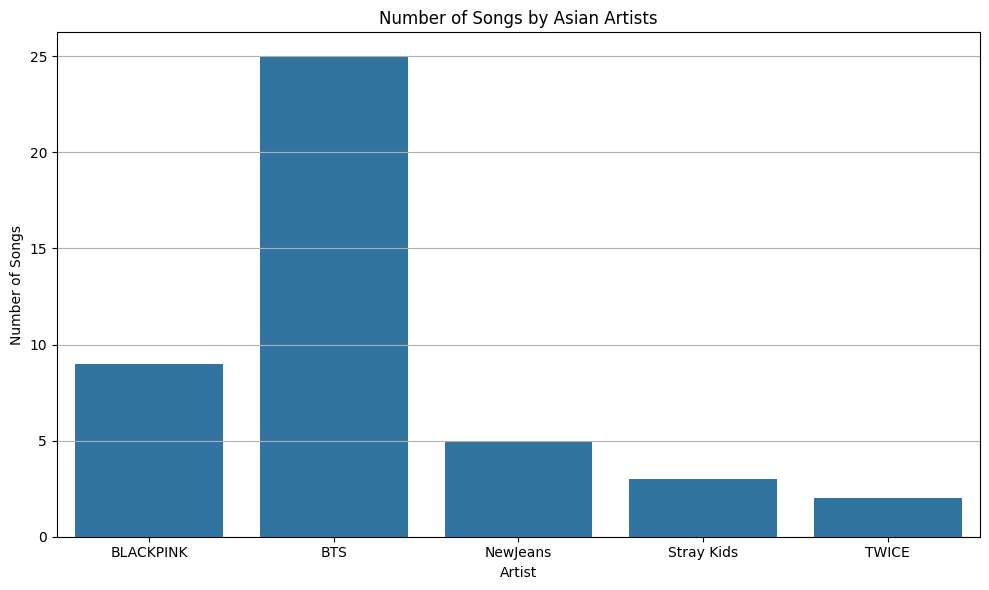

In [22]:
# Group by artist, concatenate all their tracks, and count the tracks
artist_tracks = (
    tracksbyid.groupby('name_artist')
    .agg(
        all_tracks=('name_track', ', '.join),  # Concatenate track names
        track_count=('name_track', 'count')   # Count the number of tracks
    )
    .reset_index()  # Reset index to convert back to a DataFrame
)

# Display the result
artist_tracks

# Step 3: Visualization - Number of Songs and Chart Performance
# Bar chart for number of songs
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_tracks, x='name_artist', y='track_count')
plt.title('Number of Songs by Asian Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Insight 2.1 

How many songs has each global K-pop band released?

BTS leads with 25 songs, demonstrating their prolific output and consistent engagement with fans globally, while BLACKPINK, with 9 songs, focuses on a selective, high-impact release strategy. Emerging groups like NewJeans (5 songs) and Stray Kids (3 songs) are steadily building their global presence.

### 2.2 What are The Tempo Range of songs by each K-pop band?

In [23]:
# Drop unnecessary columns to avoid conflicts during merge
tracks = tracks.drop(columns=['Unnamed: 0'], errors='ignore')
tracks_artists = tracks_artists.drop(columns=['Unnamed: 0'], errors='ignore')
artists = artists.drop(columns=['Unnamed: 0'], errors='ignore')
audio_features = audio_features.drop(columns=['Unnamed: 0'], errors='ignore')

# Merge tracks and artists using the mapping file
tracks_with_artists = pd.merge(tracks, tracks_artists, on='track_id', how='inner')
tracks_with_artists = pd.merge(tracks_with_artists, artists, on='artist_id', how='inner')

# Merge audio features with tracks and artists
tracks_audio_features = pd.merge(tracks_with_artists, audio_features, on='track_id', how='inner')

# Filter for K-pop bands
kpop_bands = ['BTS', 'BLACKPINK', 'Stray Kids', 'TWICE', 'NewJeans']
kpop_tracks = tracks_audio_features[tracks_audio_features['name_y'].isin(kpop_bands)]

# Group by band and calculate mean and standard deviation of audio features
kpop_audio_analysis = kpop_tracks.groupby('name_y').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
}).reset_index()

# Rename columns for clarity
kpop_audio_analysis.columns = [
    'Band', 'Danceability Mean', 
    'Energy Mean', 'Valence Mean',  'Tempo Mean', 
]

# Display the result
print(kpop_audio_analysis)

         Band  Danceability Mean  Energy Mean  Valence Mean  Tempo Mean
0   BLACKPINK           0.747667     0.762222      0.614111  123.321778
1         BTS           0.673120     0.733640      0.585480  115.919280
2    NewJeans           0.791600     0.725600      0.562000  136.139000
3  Stray Kids           0.819667     0.764667      0.712333  120.355000
4       TWICE           0.777000     0.841500      0.764500  122.566500


/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/1556695450.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




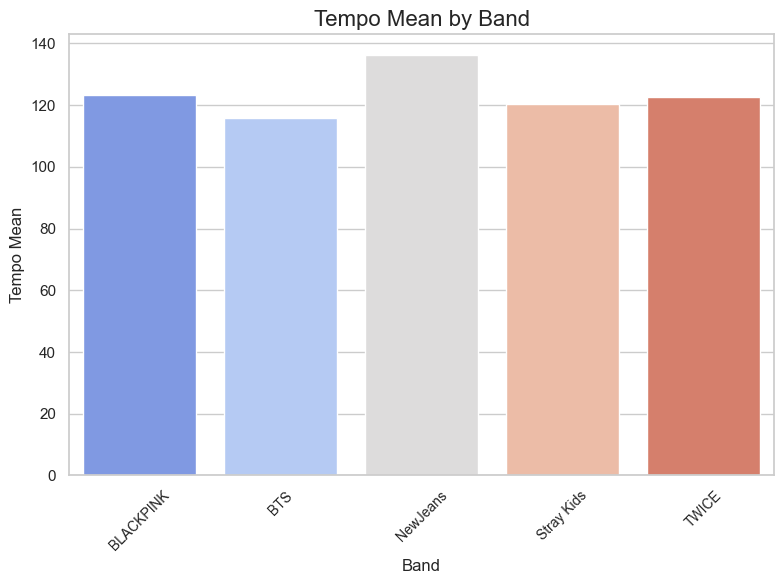

In [24]:
# Set a consistent style
sns.set(style="whitegrid")

# Bar chart for Tempo Mean by Band
plt.figure(figsize=(8, 6))
sns.barplot(data=kpop_audio_analysis, x='Band', y='Tempo Mean', palette='coolwarm')
plt.title('Tempo Mean by Band', fontsize=16)
plt.xlabel('Band', fontsize=12)
plt.ylabel('Tempo Mean', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

#### Insight 2.2
What are the Tempo Ranges of Songs by Each K-Pop Band?

NewJeans leads with the highest average tempo of 136.14 BPM, reflecting their vibrant and energetic style, while BTS, with an average tempo of 115.92 BPM, showcases a more diverse range, blending upbeat and emotionally introspective tracks.

## 2.3 What are the key audio characteristics of songs by each K-pop band?

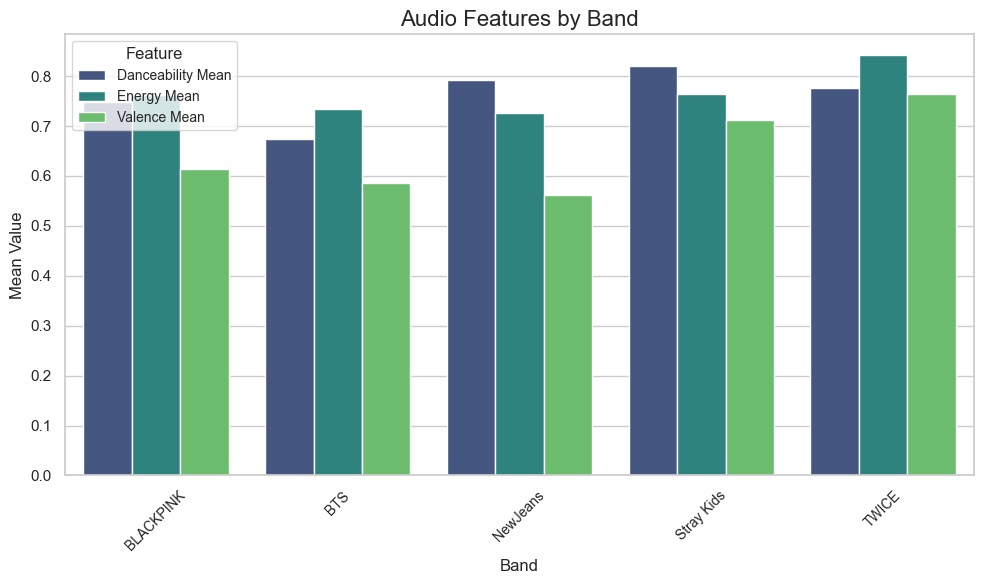

In [25]:
# Features to plot
features = ['Danceability Mean', 'Energy Mean', 'Valence Mean']

# Reshape the DataFrame for multiple features
kpop_audio_melted = kpop_audio_analysis.melt(id_vars=['Band'], 
                                             value_vars=features, 
                                             var_name='Feature', 
                                             value_name='Value')

# Bar chart for other features by Band
plt.figure(figsize=(10, 6))
sns.barplot(data=kpop_audio_melted, x='Band', y='Value', hue='Feature', palette='viridis')
plt.title('Audio Features by Band', fontsize=16)
plt.xlabel('Band', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Feature', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

#### Insights 2.3

Audio Characteristics of Songs by Each K-Pop Band

NewJeans leads in Danceability, highlighting their focus on creating highly rhythmic and dance-friendly tracks that resonate with younger, energetic audiences.

TWICE stands out with the highest Energy and Valence, showcasing their vibrant and uplifting music style, aligning with their cheerful and dynamic performances.

BLACKPINK demonstrates strong versatility across Danceability, Energy, and Valence, emphasizing their global appeal with tracks that balance rhythm, intensity, and emotional connection.

## 3  Notable Chart of these Korea bands 
How has the chart performance of K-pop bands evolved over the years?


In [26]:
tracksbyid = tracksbyid.drop(columns=['Unnamed: 0'], errors='ignore')
chart_positions = chart_positions.drop(columns=['Unnamed: 0'], errors='ignore')
# Step 1: Merge with chart positions to include chart-related information
tracks_chart = tracksbyid.merge(chart_positions, on='track_id', how='left')

# Step 2: Select the desired columns
result = tracks_chart[['name_track', 'name_artist', 'duration_ms', 'duration_minutes', 'chart_week', 'list_position']]
result

,name_track,name_artist,duration_ms,duration_minutes,chart_week,list_position
0,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2017-12-16,28
1,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2018-01-13,66
2,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2017-12-23,71
3,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2018-01-20,74
4,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2017-12-30,79
5,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2018-01-27,79
6,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2018-01-06,82
7,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2018-02-03,84
8,MIC Drop (feat. Desiigner) [Steve Aoki Remix],BTS,238726,2.6111,2018-02-10,98
9,FAKE LOVE,BTS,242333,2.504433,2018-06-02,10


## 3.1 Chart Performance Trends of K-Pop Bands Over the Years

In [27]:
grouped_data = (
    result.groupby(['name_track', 'name_artist'])['list_position']
    .value_counts()
    .reset_index(name='count')  # Add a count column
    .sort_values(by='list_position')  # Sort by list_position
)

# Display the grouped data
grouped_data


,name_track,name_artist,list_position,count
100,Life Goes On,BTS,1,1
36,Dynamite,BTS,1,3
125,Permission to Dance,BTS,1,1
13,Butter,BTS,1,10
35,Dynamite,BTS,2,4
41,Dynamite,BTS,3,1
123,ON,BTS,4,1
15,Butter,BTS,4,1
38,Dynamite,BTS,5,2
126,Permission to Dance,BTS,7,1


In [28]:
# Step 1: Extract the year from the `chart_week`
result['chart_year'] = pd.to_datetime(result['chart_week']).dt.year

# Step 2: Group by artist and chart year, and count unique songs
songs_per_year = (
    result.groupby(['name_artist', 'chart_year'])['name_track']
    .nunique()
    .reset_index(name='song_count')  # Add a column for song count
)

# Step 3: Display the result
songs_per_year

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/3908143338.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name_artist,chart_year,song_count
0,BLACKPINK,2018,2
1,BLACKPINK,2019,1
2,BLACKPINK,2020,4
3,BLACKPINK,2022,2
4,BTS,2017,2
5,BTS,2018,4
6,BTS,2019,2
7,BTS,2020,9
8,BTS,2021,5
9,BTS,2022,4


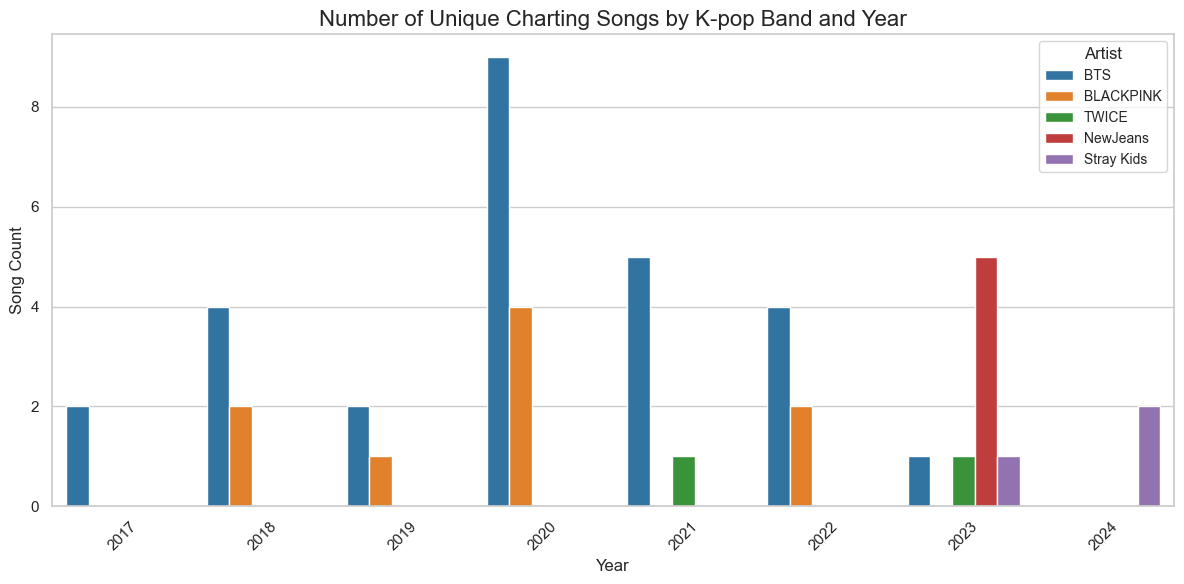

In [29]:
# Bar chart to show song count per year for each artist
plt.figure(figsize=(12, 6))
sns.barplot(data=songs_per_year, x='chart_year', y='song_count', hue='name_artist', palette='tab10')
plt.title('Number of Unique Charting Songs by K-pop Band and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Song Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Artist', fontsize=10)
plt.tight_layout()
plt.show()

#### Insights 3.1

Chart Performance Trends of K-Pop Bands Over the Years

BTS's Sustained Dominance:
BTS consistently charted songs from 2017 to 2023, with their peak in 2020, when they charted 9 songs. This reflects their global dominance and ability to release multiple impactful tracks in a single year.

BLACKPINK’s High-Impact Strategy:
BLACKPINK charted songs from 2018 to 2022, peaking in 2020 with 4 songs. Despite fewer releases compared to BTS, their selective approach ensures each track gains significant attention and popularity.

Rising Stars and Momentum:

NewJeans made a strong debut in 2023, with 5 songs charting, signaling rapid market entry and strong fan engagement.
Stray Kids showed growth from 1 song in 2023 to 2 songs in 2024, indicating steady progress in building their global presence.
These insights showcase the different strategies and trajectories of K-pop bands as they navigate global chart performance.

### 3.2 Evolution of Audio Features in Charted Songs by K-Pop Bands

How have the audio features (e.g., danceability, energy, tempo, and valence) of songs by K-pop bands evolved over the years, and what does this reveal about their musical trends?

In [30]:
### What kind of song of their bands 

# Step 1: Extract the year from the `chart_week`
result['chart_year'] = pd.to_datetime(result['chart_week']).dt.year

# Step 2: Group by artist and chart year, and concatenate unique songs
songs_per_year = (
    result.groupby(['name_artist', 'chart_year'])['name_track']
    .unique()  # Get unique track names
    .reset_index(name='unique_tracks')  # Add a column for unique tracks
)

# Step 3: Concatenate the track names into a single string
songs_per_year['unique_tracks'] = songs_per_year['unique_tracks'].apply(lambda x: ', '.join(x))

# Display the result
songs_per_year

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/998484514.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name_artist,chart_year,unique_tracks
0,BLACKPINK,2018,"DDU-DU DDU-DU, Kiss and Make Up"
1,BLACKPINK,2019,Kill This Love
2,BLACKPINK,2020,"Sour Candy (with BLACKPINK), Ice Cream (with S..."
3,BLACKPINK,2022,"Pink Venom, Shut Down"
4,BTS,2017,"MIC Drop (feat. Desiigner) [Steve Aoki Remix],..."
5,BTS,2018,"MIC Drop (feat. Desiigner) [Steve Aoki Remix],..."
6,BTS,2019,"Boy With Luv (feat. Halsey), Make It Right (fe..."
7,BTS,2020,"Black Swan, ON, My Time, Filter, Dynamite, Lif..."
8,BTS,2021,"Dynamite, Film out, Butter, Permission to Danc..."
9,BTS,2022,"Yet To Come, Run BTS, Bad Decisions (with BTS ..."


How have the audio features (e.g., danceability, energy, loudness, tempo, and valence) evolved for different K-pop bands over the years?How have the audio features (e.g., danceability, energy, loudness, tempo, and valence) evolved for different K-pop bands over the years?

   chart_year  danceability    energy  loudness   valence       tempo
0        2018      0.674667  0.762000 -4.470000  0.559667  113.277333
1        2019      0.763000  0.835000 -5.234000  0.645000  131.875000
2        2020      0.779391  0.755348 -4.036565  0.814609  149.038348
3        2022      0.803333  0.699333 -6.474667  0.703667   96.706000


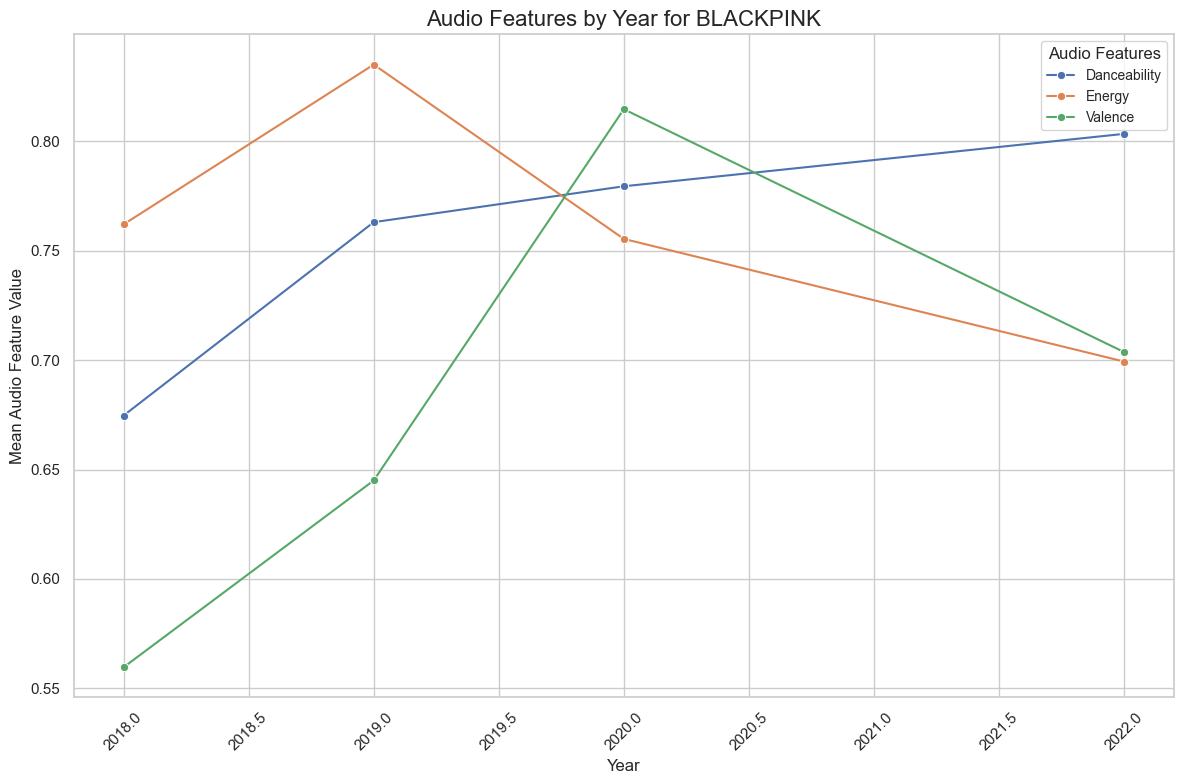

   chart_year  danceability    energy  loudness   valence       tempo
0        2017      0.608000  0.820692 -4.228923  0.662154  157.577154
1        2018      0.623250  0.811312 -4.206875  0.540250  139.749437
2        2019      0.632600  0.825600 -5.370600  0.711000  115.471200
3        2020      0.731000  0.737133 -4.493067  0.693267  116.547787
4        2021      0.739632  0.697158 -4.314763  0.727987  118.001461
5        2022      0.843522  0.662246 -4.521957  0.768928  106.894783
6        2023      0.617000  0.589000 -5.978000  0.566000   92.991000


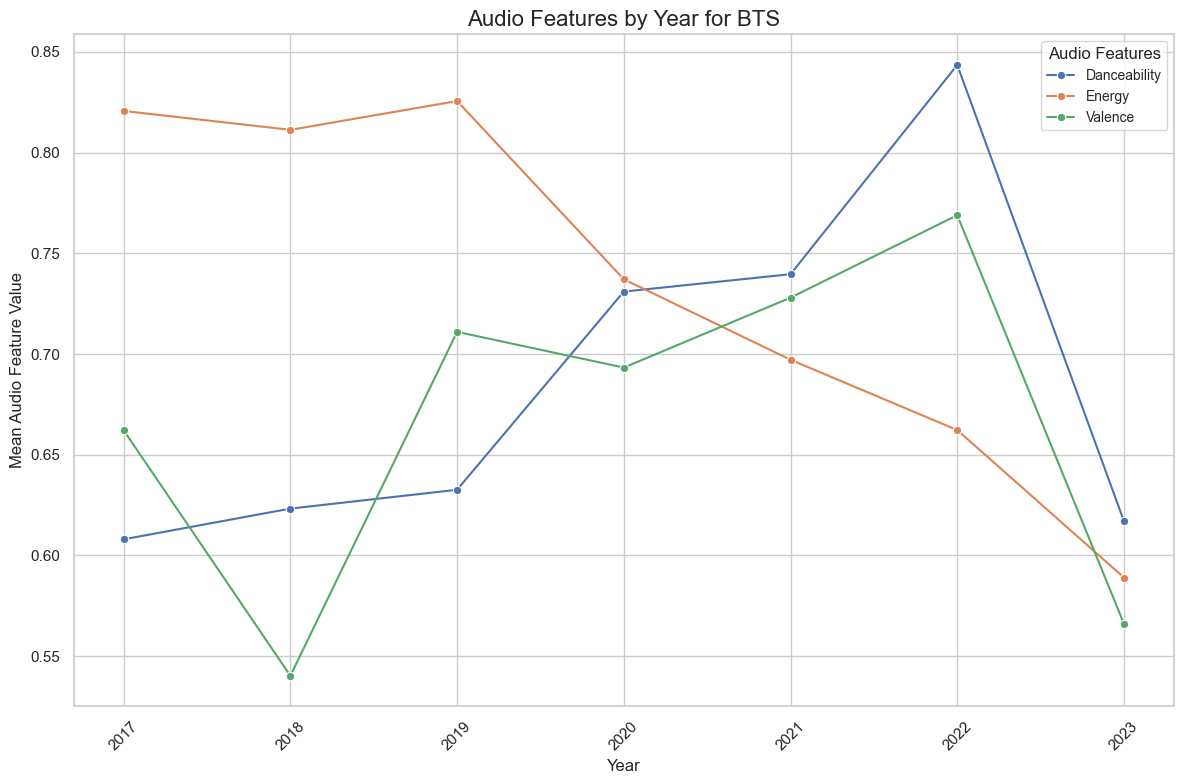

In [31]:
def analyze_audio_features_by_band_and_year(result, tracks_audio_features, band_name):
    # Merge the `result` DataFrame with `tracks_audio_features` using the correct column names
    audiofeaturebykpopband = result.merge(tracks_audio_features, left_on='name_track', right_on='name_x', how='left')

    # Filter the data for the specific band
    band_data = audiofeaturebykpopband[audiofeaturebykpopband['name_artist'] == band_name]

    # Group by year and calculate the mean of audio features
    audio_features_by_year = (
        band_data.groupby(['chart_year'])[['danceability', 'energy', 'loudness', 'valence', 'tempo']]
        .mean()  # Calculate the mean of each audio feature per year for the specific band
        .reset_index()
    )

    # Step 3: Display the result (average audio features per band and year)
    print(audio_features_by_year)

    # Visualization: Plot audio features by year for the specific band
    plt.figure(figsize=(12, 8))

    # Create line plots for each feature
    sns.lineplot(data=audio_features_by_year, x='chart_year', y='danceability', marker='o', label='Danceability')
    sns.lineplot(data=audio_features_by_year, x='chart_year', y='energy', marker='o', label='Energy')
    #sns.lineplot(data=audio_features_by_year, x='chart_year', y='loudness', marker='o', label='Loudness')
    sns.lineplot(data=audio_features_by_year, x='chart_year', y='valence', marker='o', label='Valence')
    #sns.lineplot(data=audio_features_by_year, x='chart_year', y='tempo', marker='o', label='Tempo')

    # Customize the plot
    plt.title(f'Audio Features by Year for {band_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Mean Audio Feature Value', fontsize=12)
    plt.legend(title='Audio Features', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return audio_features_by_year

# Example usage of the function
band_name = 'BLACKPINK'  # Example band name, can change the band name 
audio_features_by_year_result = analyze_audio_features_by_band_and_year(result, tracks_audio_features, band_name)

# Example usage of the function
band_name = 'BTS'  # Example band name , can change the band name 
audio_features_by_year_result = analyze_audio_features_by_band_and_year(result, tracks_audio_features, band_name)

### Insights 3.2

Evolution of Audio Features by K-Pop Bands

BTS's Evolving Trends:
Over the years, BTS's songs showed a steady increase in danceability, reflecting their growing focus on rhythmic, energetic tracks. However, in 2023, danceability dropped to 0.62, alongside reductions in energy and valence, suggesting a shift toward more introspective or experimental music during that period.

BLACKPINK’s High Energy Start:
BLACKPINK began with high danceability and energy in their earlier releases. Similar to BTS, their danceability saw a decline in 2023, indicating a potential trend in diversifying their musical style with more nuanced tracks.

### Key Takeaways

Both BTS and BLACKPINK exhibited shifts in their musical features over time, moving from high-energy, danceable tracks to slightly more restrained or experimental compositions in recent years.

These trends reflect a potential strategy to explore new styles and reach broader audiences while maintaining their global appeal.

## 4.Top list Position of kpop Band and Tracks

### Which K-pop bands and tracks dominate the top chart position, and what are their common characteristics?

In [32]:
# Checking Top Track of Kpop band which listed in position 1 and how many week. 
top_tracks=grouped_data.loc[grouped_data.list_position==1].reset_index()
top_tracks_chart = top_tracks.rename(columns={'count':'Most Weeks at Chart Position 1'})
top_tracks_chart


,index,name_track,name_artist,list_position,Most Weeks at Chart Position 1
0,100,Life Goes On,BTS,1,1
1,36,Dynamite,BTS,1,3
2,125,Permission to Dance,BTS,1,1
3,13,Butter,BTS,1,10


/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/3289202266.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




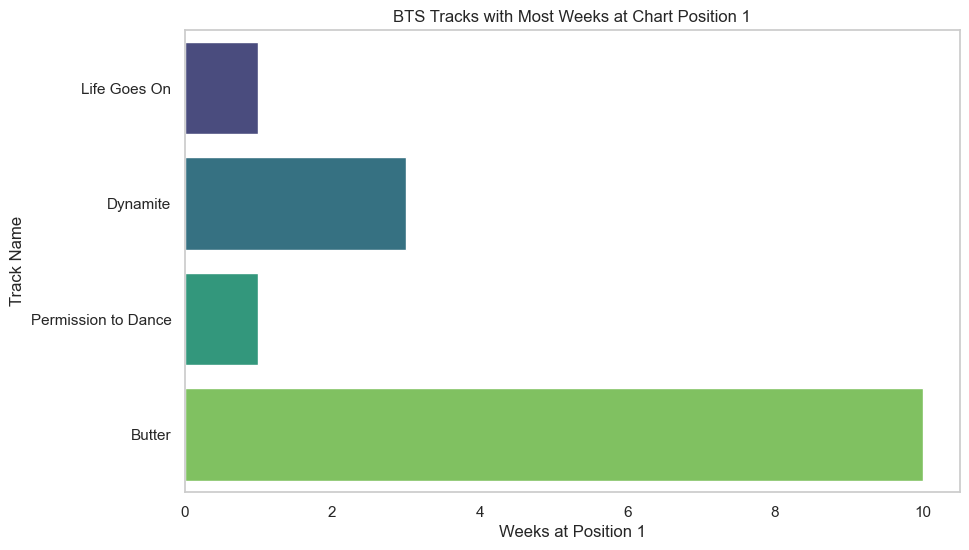

In [33]:
# Plot chart performance
plt.figure(figsize=(10, 6))
sns.barplot(data=top_tracks_chart, x='Most Weeks at Chart Position 1', y='name_track', palette='viridis')
plt.title("BTS Tracks with Most Weeks at Chart Position 1")
plt.xlabel("Weeks at Position 1")
plt.ylabel("Track Name")
plt.grid(axis='x')
plt.show()

#### Insight 1: 

Top Chart Position of K-Pop Bands and Tracks

BTS's Dominance at the Top:
BTS consistently dominates the top chart positions with tracks like "Butter" holding the #1 position for 10 weeks, making it their most successful track in terms of chart longevity. Other hits like "Dynamite" stayed at #1 for 3 weeks, further showcasing their global appeal and ability to release consecutive chart-topping tracks.

## 4.1 Audio Features of TOp Tracks_BTS
How do the audio features of BTS's top tracks contribute to their global popularity and distinct musical style?

   index    name_track name_artist  list_position  \
0    100  Life Goes On         BTS              1   
1    100  Life Goes On         BTS              1   
2    100  Life Goes On         BTS              1   
3    100  Life Goes On         BTS              1   
4    100  Life Goes On         BTS              1   

   Most Weeks at Chart Position 1                track_id        name_x  \
0                               1  5FVbvttjEvQ8r2BgUcJgNg  Life Goes On   
1                               1  0eu4C55hL6x29mmeAjytzC  Life Goes On   
2                               1  2bSk87AVkCIIC3Bcligq1z  Life Goes On   
3                               1  2bSk87AVkCIIC3Bcligq1z  Life Goes On   
4                               1  2bSk87AVkCIIC3Bcligq1z  Life Goes On   

   duration_ms release_date album_type  explicit               artist_id  \
0       207481   2020-11-20      album     False  3Nrfpe0tUJi4K4DXYWgMUX   
1       161803   2021-05-28      album     False  6TLwD7HPWuiOzvXEa3oCNe   
2 

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/1769524767.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




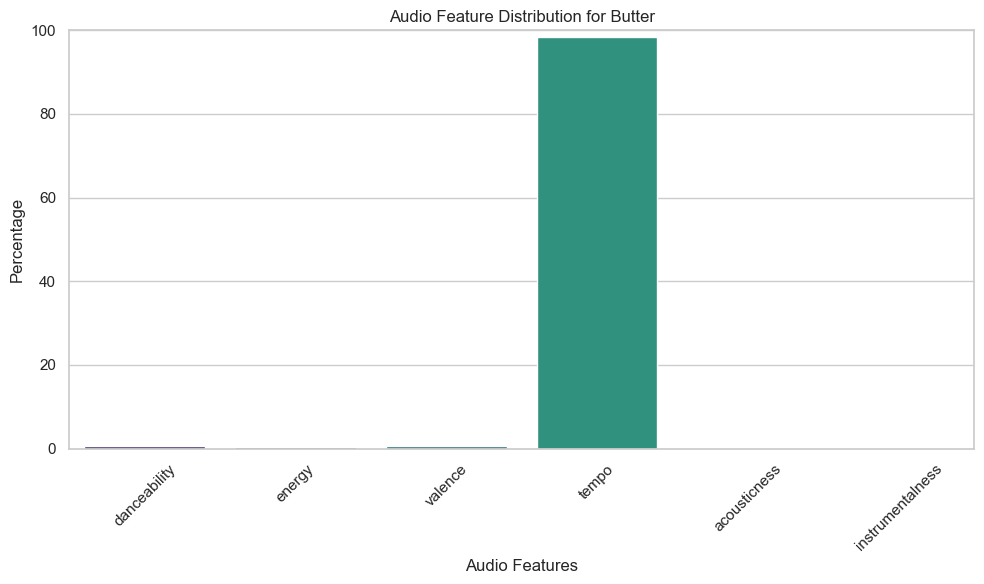

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/1769524767.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




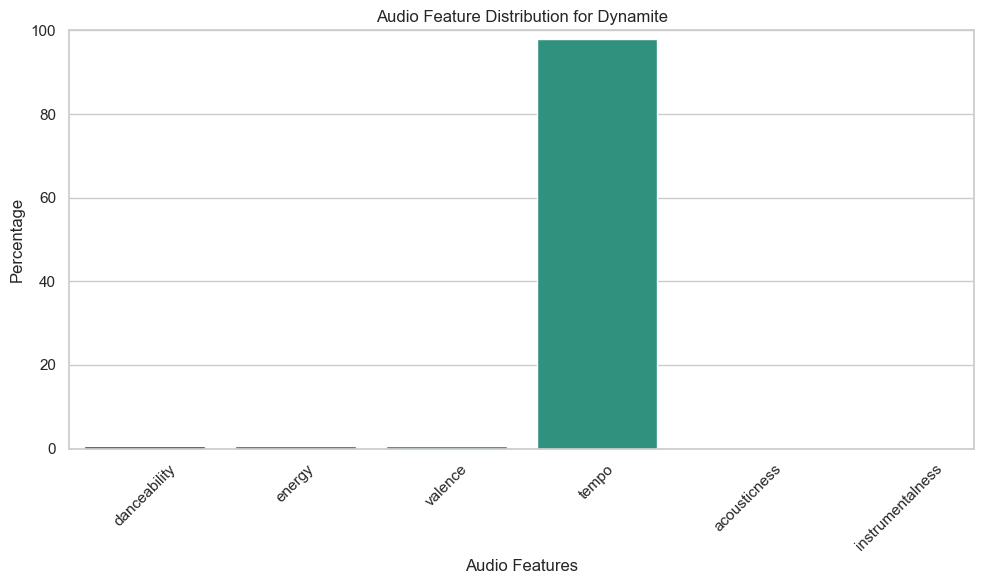

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/1769524767.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




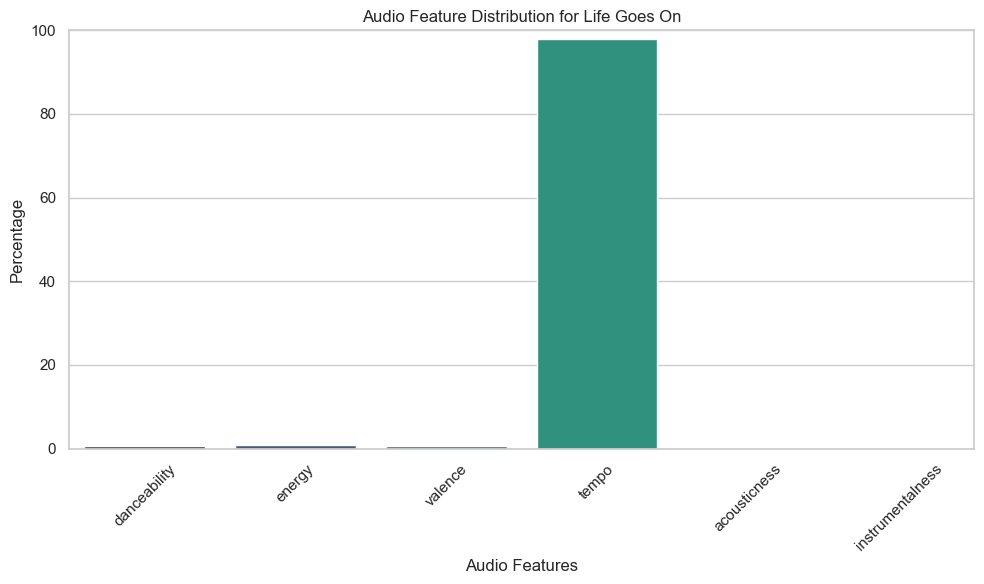

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/1769524767.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




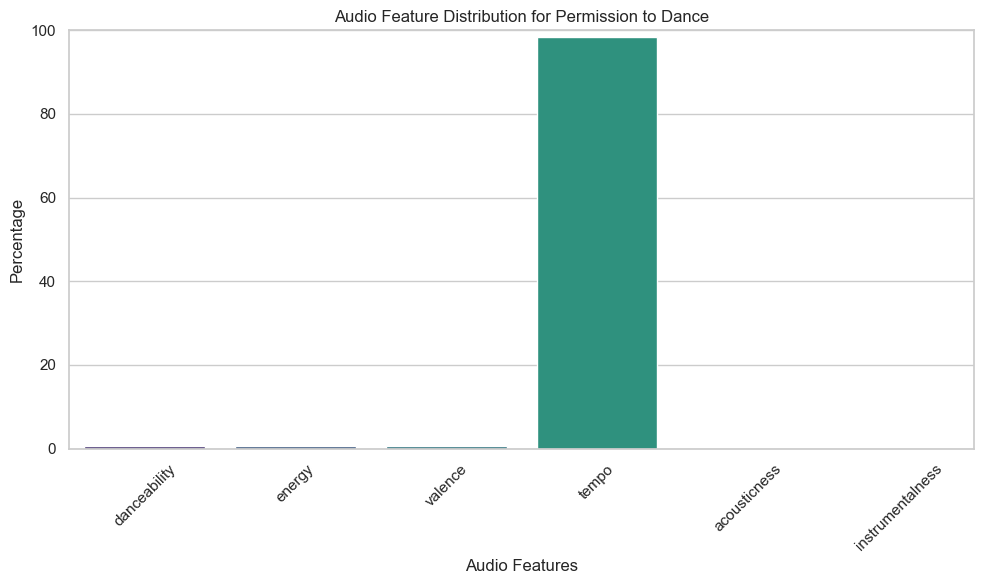

In [34]:
top_tracks_with_features = top_tracks_chart.merge(tracks_audio_features, left_on='name_track', right_on='name_x', how='left')

# Step 3: Check the merged DataFrame (optional debugging step)
print(top_tracks_with_features.head())
# List of audio features
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']

# Normalize features to calculate percentages
top_tracks_with_features['total_features'] = top_tracks_with_features[audio_features].sum(axis=1)
for feature in audio_features:
    top_tracks_with_features[feature + '_percentage'] = (top_tracks_with_features[feature] / top_tracks_with_features['total_features']) * 100

# Generate bar charts for each song
for track_name, track_data in top_tracks_with_features.groupby('name_track'):
    # Extract percentages for the current song
    feature_percentages = track_data.iloc[0][[f + '_percentage' for f in audio_features]].values
    feature_labels = audio_features

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=feature_labels,
        y=feature_percentages,
        palette=sns.color_palette('viridis', len(audio_features))
    )

    # Customize the chart
    plt.title(f"Audio Feature Distribution for {track_name}")
    plt.xlabel("Audio Features")
    plt.ylabel("Percentage")
    plt.ylim(0, 100)  # Set y-axis to display percentages (0–100)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Ensure everything fits well in the figure
    plt.show()


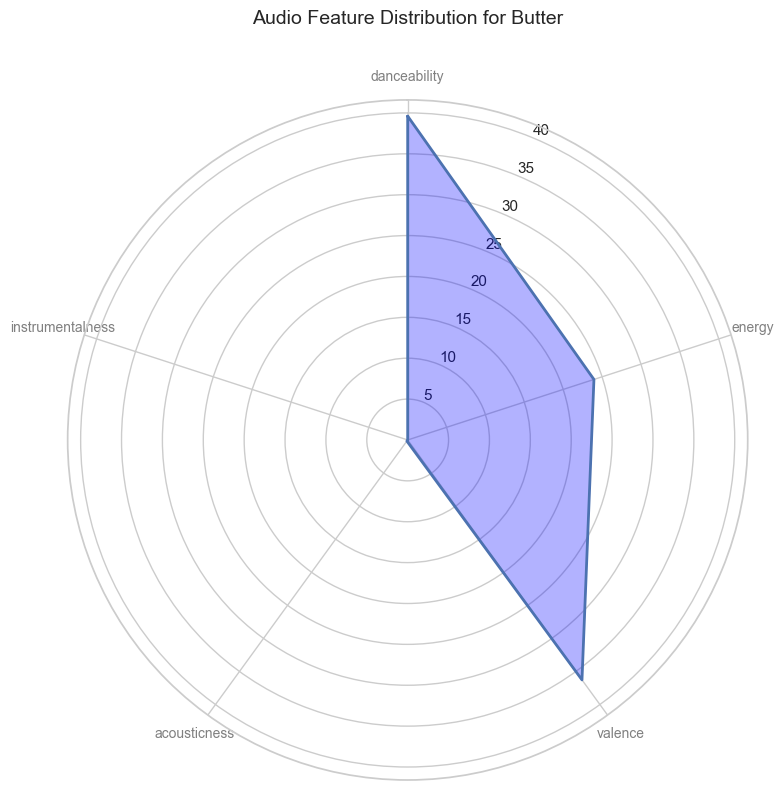

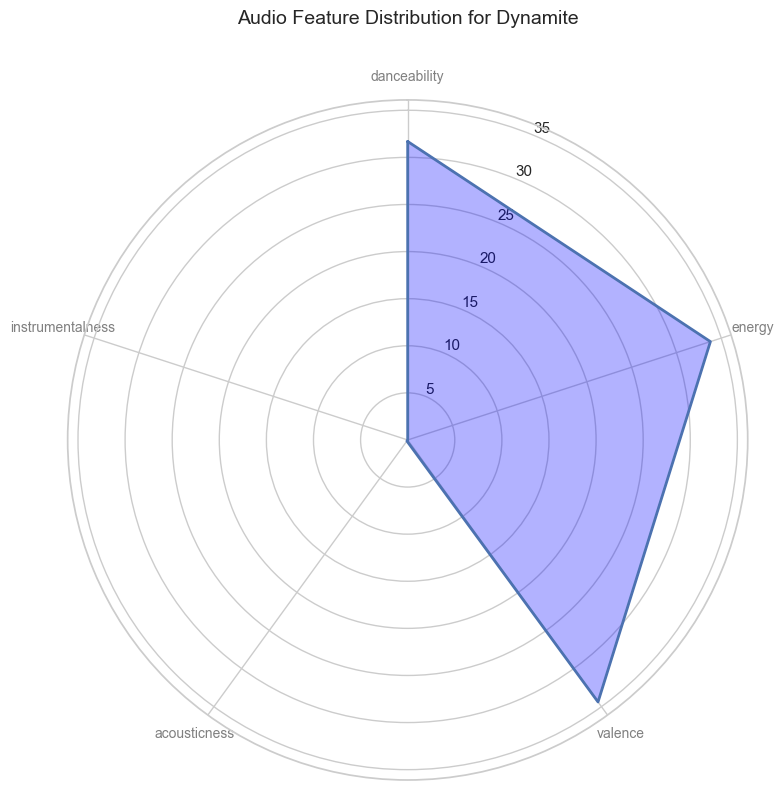

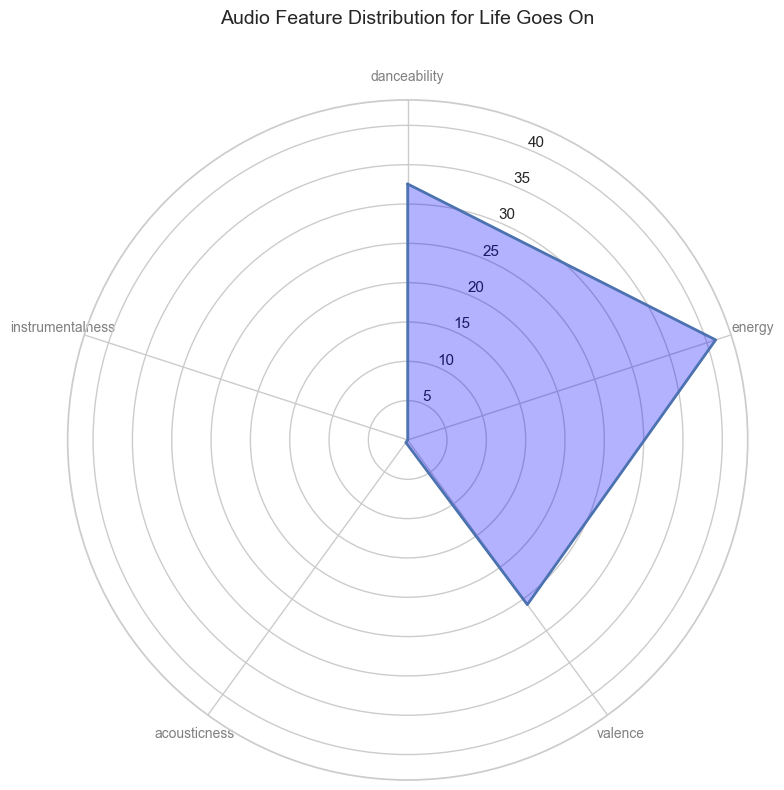

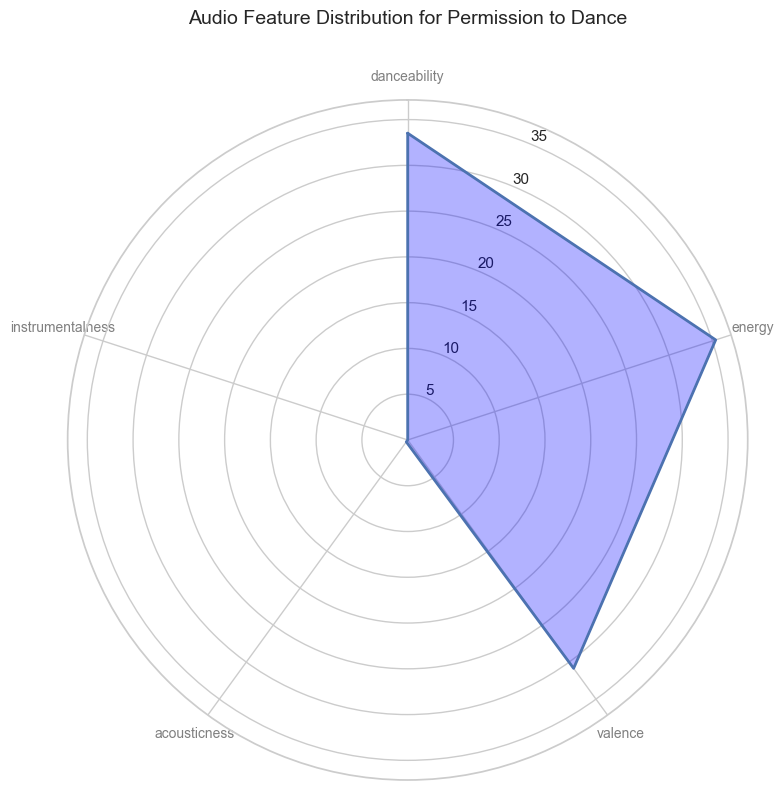

In [35]:
# Audio Feature Analysis Without Tempo 
# List of audio features
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

# Normalize features to calculate percentages
top_tracks_with_features['total_features'] = top_tracks_with_features[audio_features].sum(axis=1)
for feature in audio_features:
    top_tracks_with_features[feature + '_percentage'] = (top_tracks_with_features[feature] / top_tracks_with_features['total_features']) * 100

# Generate radar charts for each song
for track_name, track_data in top_tracks_with_features.groupby('name_track'):
    # Extract percentages for the current song
    feature_percentages = track_data.iloc[0][[f + '_percentage' for f in audio_features]].values
    feature_labels = audio_features

    # Prepare data for the radar chart
    values = list(feature_percentages) + [feature_percentages[0]]  # Close the loop
    angles = [n / float(len(feature_labels)) * 2 * pi for n in range(len(feature_labels))]
    angles += angles[:1]  # Complete the circle

    # Plot the radar chart
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)  # Start from the top
    ax.set_theta_direction(-1)  # Clockwise direction

    # Draw one line per feature and fill the area
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=track_name)
    ax.fill(angles, values, color='blue', alpha=0.3)

    # Add labels
    plt.xticks(angles[:-1], feature_labels, color='grey', size=10)

    # Add title
    plt.title(f"Audio Feature Distribution for {track_name}", size=14, y=1.1)
    plt.tight_layout()
    plt.show()

### Insights 4.1

Audio Features of BTS's Top Tracks

Balanced Danceability and Energy:
BTS's top tracks, such as "Life Goes On" and "Dynamite", showcase danceability scores between 0.56 and 0.71 and energy levels between 0.49 and 0.72. This balance allows their songs to appeal to both casual listeners and fans of upbeat, rhythmic tracks, contributing to their widespread global appeal.

Moderate Loudness for Versatility:
With loudness levels averaging around -5.7 dB, BTS's tracks strike a balance between impactful sound and emotional nuance, making their music suitable for a variety of moods and listening environments.

Accessible Tempos:
The tempos of their top tracks range from 79.98 BPM to 139.98 BPM, providing variety in pacing while maintaining accessibility for danceability and sing-alongs, both key factors for engaging fans globally.

Key and Valence Reflect Diversity:
The tracks feature diverse musical keys and valence scores, which range from uplifting to introspective moods. This variety caters to different emotional experiences, enhancing their ability to connect with a broad audience.

These audio features collectively contribute to BTS’s unique musical style, blending rhythmic appeal with emotional depth. Their versatility allows them to dominate charts and maintain a loyal fanbase while continually attracting new listeners globally.

# 5 Solo Success of BTS Members: Exploring Individual Impact and Global Reach
How many globally solo songs has each BTS member released
Which BTS member has the most songs in their solo career?

In [36]:
# List of artist names I want to check
bts_member = ['V', 'Jung Kook', 'Jimin', "RM", "Agust D"]

# Step 1: Get the artist_id for the current artist
artist_data_bm = artists.loc[artists['name'].isin(bts_member)]  # Use `band` here instead of `artist_name
tracks_mapping = tracks_artists.merge(artist_data_bm, on='artist_id') 


tracksbyidbm = tracks.merge(tracks_mapping, on='track_id', suffixes=('_track', '_artist'))
tracksbyidbm['duration_minutes'] = tracks['duration_ms'] / 60000
tracksbyidbm[['name_track', 'name_artist', 'duration_ms','duration_minutes']]


,name_track,name_artist,duration_ms,duration_minutes
0,Christmas Tree,V,209946,2.6111
1,Stay Alive (Prod. SUGA of BTS),Jung Kook,210928,2.504433
2,Stay Alive (Prod. SUGA of BTS),Jung Kook,210928,3.112217
3,Left and Right (Feat. Jung Kook of BTS),Jung Kook,154486,3.202667
4,Wild Flower (with youjeen),RM,273499,3.202667
5,Like Crazy,Jimin,212241,3.202667
6,Haegeum,Agust D,168926,3.0211
7,VIBE (feat. Jimin of BTS),Jimin,175775,2.774217
8,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...",Jimin,175802,3.816667
9,Love Me Again,V,182293,3.18


In [37]:
# Step 1: Group by artist name and concatenate track names
grouped_tracks = tracksbyidbm.groupby('name_artist').agg(
    tracks_concat=('name_track', ' '.join),  # Concatenate track names into one string
    total_duration=('duration_minutes', 'sum')  # Sum the durations for each artist
).reset_index()

# Display the result
grouped_tracks[['name_artist', 'tracks_concat', 'total_duration']]# Step 2: Group by artist name and concatenate track names
grouped_tracks = tracksbyidbm.groupby('name_artist').agg(
    tracks_concat=('name_track', ' '.join),  # Concatenate track names into one string
    total_duration=('duration_minutes', 'sum')  # Sum the durations for each artist
).reset_index()

# Display the result
grouped_tracks[['name_artist', 'tracks_concat', 'total_duration']]

,name_artist,tracks_concat,total_duration
0,Agust D,Haegeum Daechwita,6.41065
1,Jimin,Like Crazy VIBE (feat. Jimin of BTS) Angel Pt....,23.902317
2,Jung Kook,Stay Alive (Prod. SUGA of BTS) Stay Alive (Pro...,29.075283
3,RM,Wild Flower (with youjeen) Neva Play (feat. RM...,7.797767
4,V,Christmas Tree Love Me Again Slow Dancing FRI(...,13.905983


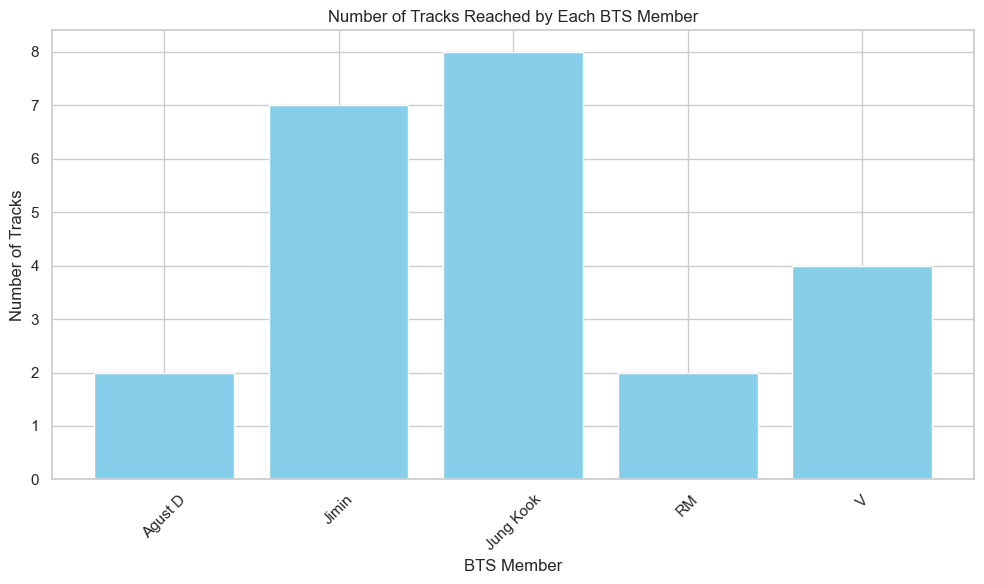

In [38]:
# Step 3: Count the number of tracks released by each BTS member
track_count = tracksbyidbm.groupby('name_artist').size().reset_index(name='Track Count')

# Step 4: Create the bar chart to visualize the number of tracks per BTS member
plt.figure(figsize=(10, 6))
plt.bar(track_count['name_artist'], track_count['Track Count'], color='skyblue')
plt.xlabel('BTS Member')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks Reached by Each BTS Member')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights 

Solo Success of BTS Members

Jung Kook Leads in Solo Releases:
Jung Kook has released the most solo tracks (8), showcasing his strong focus on building a global solo presence. His songs, such as "Seven" and "3D," have garnered significant attention, further solidifying his individual branding.

Jimin’s Strong Solo Contributions:
With 7 solo tracks, Jimin actively contributes to BTS's solo endeavors. Tracks like "Set Me Free Pt.2" and "Like Crazy" highlight his ability to blend emotional depth with rhythmic appeal, resonating with a wide audience.

Quality Over Quantity for V, RM, and Agust D:
Members like V (4 tracks), RM, and Agust D (2 tracks each) focus on fewer but highly distinctive releases, such as "Wild Flower" (RM) and "Daechwita" (Agust D). These tracks emphasize their unique artistic styles and maintain their relevance as individual artists.

### 5.1 Chart Success of BTS Members' Solo Tracks: Analyzing Top Positions and Trends

In [39]:
#  chart_positions of their song 

tracksbyidbm = tracksbyidbm.drop(columns=['Unnamed: 0'], errors='ignore')
chart_positions = chart_positions.drop(columns=['Unnamed: 0'], errors='ignore')
# Step 1: Merge with chart positions to include chart-related information
tracks_chartbs = tracksbyidbm.merge(chart_positions, on='track_id', how='left')

# Step 2: Select the desired columns
resultbs = tracks_chartbs[['name_track', 'name_artist', 'duration_ms', 'duration_minutes', 'chart_week', 'list_position']]
# Step 3: Sort by 'list_position'
resultbs = resultbs.sort_values(by='list_position')

# Display the result
resultbs


,name_track,name_artist,duration_ms,duration_minutes,chart_week,list_position
23,Like Crazy,Jimin,212241,3.202667,2023-04-08,1
70,Seven (feat. Latto),Jung Kook,184400,4.814,2023-07-29,1
34,Standing Next to You,Jung Kook,206019,3.778433,2023-11-18,5
85,3D (feat. Jack Harlow),Jung Kook,201812,3.726217,2023-10-14,5
71,Seven (feat. Latto),Jung Kook,184400,4.814,2023-08-05,9
56,Who,Jimin,170887,3.836117,2024-08-10,12
57,Who,Jimin,170887,3.836117,2024-08-03,14
5,Left and Right (Feat. Jung Kook of BTS),Jung Kook,154486,3.202667,2022-07-09,22
1,Stay Alive (Prod. SUGA of BTS),Jung Kook,210928,2.504433,2020-12-05,22
3,Stay Alive (Prod. SUGA of BTS),Jung Kook,210928,3.112217,2020-12-05,22


In [40]:
# Step 4: Group by 'name_artist' and 'name_track' to concatenate list positions
grouped_resultbs = tracks_chartbs.groupby(['name_artist', 'name_track']).agg(
    list_positions=('list_position', lambda x: ', '.join(map(str, x.unique())))  # Concatenate unique list positions
    # Include duration in minutes (optional)
).reset_index()

# Display the result
grouped_resultbs.sort_values(by='list_positions')

,name_artist,name_track,list_positions
3,Jimin,Like Crazy,"1, 45, 52, 85, 97"
11,Jung Kook,Seven (feat. Latto),"1, 9, 28, 30, 32, 37, 44, 49, 53, 57, 91, 99"
7,Jimin,Who,"12, 14, 24, 26, 28, 29, 30, 32, 38, 81"
9,Jung Kook,Left and Right (Feat. Jung Kook of BTS),"22, 37, 40, 41, 42, 43, 44, 45, 47, 48, 51, 57..."
13,Jung Kook,Stay Alive (Prod. SUGA of BTS),"22, 95"
4,Jimin,Set Me Free Pt.2,30
15,RM,Neva Play (feat. RM of BTS),"36, 79"
14,Jung Kook,TOO MUCH,"44, 66, 92, 93, 94"
12,Jung Kook,Standing Next to You,"5, 50, 61, 70, 72, 73, 76, 79, 80, 81, 85, 87,..."
8,Jung Kook,3D (feat. Jack Harlow),"5, 58, 72, 75, 84, 92, 93, 100"


In [41]:
# 5 Group by artist name and concatenate track names
grouped_tracks = tracksbyidbm.groupby('name_artist').agg(
    tracks_concat=('name_track', ' '.join),  # Concatenate track names into one string
    total_duration=('duration_minutes', 'sum')  # Sum the durations for each artist
).reset_index()

# Display the result
grouped_tracks[['name_artist', 'tracks_concat', 'total_duration']]

,name_artist,tracks_concat,total_duration
0,Agust D,Haegeum Daechwita,6.41065
1,Jimin,Like Crazy VIBE (feat. Jimin of BTS) Angel Pt....,23.902317
2,Jung Kook,Stay Alive (Prod. SUGA of BTS) Stay Alive (Pro...,29.075283
3,RM,Wild Flower (with youjeen) Neva Play (feat. RM...,7.797767
4,V,Christmas Tree Love Me Again Slow Dancing FRI(...,13.905983


### Insights 5.1 

Chart Positions of BTS Members' Solo Tracks

Jung Kook's Chart-Topping Success:
Jung Kook consistently achieves top chart positions with his solo tracks. "Seven (feat. Latto)" peaked at #1 and maintained strong positions, appearing multiple times in the top 10. Similarly, "Standing Next to You" and "3D (feat. Jack Harlow)" frequently charted in the top 50, demonstrating his widespread popularity and ability to sustain momentum across multiple releases.

Jimin’s Notable Contributions:
Jimin's track "Like Crazy" reached #1, reflecting his strong solo appeal. Tracks like "Who" and "Set Me Free Pt.2" consistently charted in prominent positions, showcasing his ability to maintain visibility and relevance as a solo artist while appealing to diverse audience segments.

## 6. Market Distribution(US, UK, Jp, Cn) by KPOP Artists

How do K-pop artists perform across key global markets (US, UK, Japan, and China), and what trends emerge in their market distribution?

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/2979913251.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/2979913251.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/2979913251.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

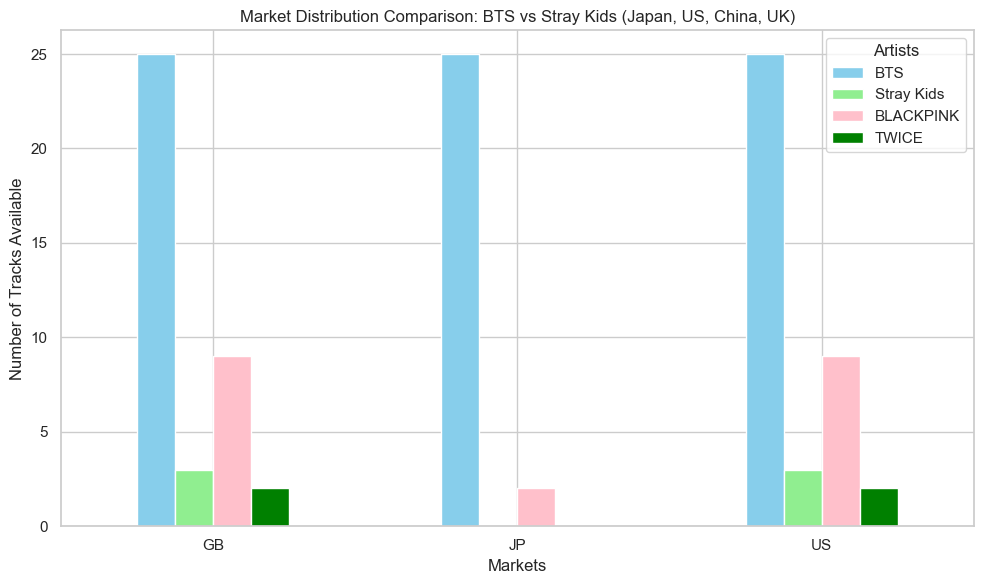

In [42]:
# Helper function to calculate market counts for an artist
def get_market_distribution(artist_name, specific_markets):
    # Step 1: Find the artist_id
    artist_id = artists[artists['name'] == artist_name]['artist_id'].iloc[0]
    
    # Step 2: Get all tracks associated with the artist (filter by artist_id)
    artist_tracks = tracks_artists[tracks_artists['artist_id'] == artist_id]
    
    # Step 3: Extract the track_ids
    artist_track_ids = artist_tracks['track_id'].tolist()
    
    # Step 4: Filter the market dataset to only include the artist's tracks
    artist_market_data = market_data[market_data['track_id'].isin(artist_track_ids)]
    
    # Step 5: Split the available markets and count their occurrences
    artist_market_data['available_market'] = artist_market_data['available_market'].str.split(',')
    markets_count = artist_market_data['available_market'].explode().value_counts()
    
    # Step 6: Filter for specific markets
    filtered_markets = markets_count[markets_count.index.isin(specific_markets)]
    
    return filtered_markets

# Define specific markets
specific_markets = ['JP', 'US', 'CN', 'GB']  # Japan, US, China, UK

# Get market distributions for BTS and Stray Kids
bts_markets = get_market_distribution('BTS', specific_markets)
stray_kids_markets = get_market_distribution('Stray Kids', specific_markets)
bp_markets = get_market_distribution('BLACKPINK', specific_markets)
tw_markets = get_market_distribution('TWICE', specific_markets)

# Combine data into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'BTS': bts_markets,
    'Stray Kids': stray_kids_markets,
    'BLACKPINK': bp_markets,
    'TWICE': tw_markets
}).fillna(0)  # Fill NaN with 0 for missing markets

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen','pink','green'])
plt.title('Market Distribution Comparison: BTS vs Stray Kids (Japan, US, China, UK)')
plt.xlabel('Markets')
plt.ylabel('Number of Tracks Available')
plt.xticks(rotation=0)
plt.legend(title='Artists')
plt.tight_layout()
plt.show()

## Insights, BTS is in three countries/ JP/ only BTS and blackpink 

In [43]:
def get_tracks_by_market(artist_name, market_code):
    # Step 1: Find the artist_id
    artist_id = artists[artists['name'] == artist_name]['artist_id'].iloc[0]
    
    # Step 2: Get all tracks associated with the artist (filter by artist_id)
    artist_tracks = tracks_artists[tracks_artists['artist_id'] == artist_id]
    
    # Step 3: Extract the track_ids
    artist_track_ids = artist_tracks['track_id'].tolist()
    
    # Step 4: Filter the market dataset to only include the artist's tracks
    artist_market_data = market_data[market_data['track_id'].isin(artist_track_ids)]
    
    # Step 5: Split available markets for each track
    artist_market_data['available_market'] = artist_market_data['available_market'].str.split(',')
    
    # Step 6: Filter rows where the market includes the specified market code
    filtered_tracks = artist_market_data[artist_market_data['available_market'].apply(lambda x: market_code in x)]
    
    # Step 7: Get track_ids from the filtered market
    track_ids = filtered_tracks['track_id'].tolist()
    
    # Step 8: Join with tracks dataset to get track names
    track_names = tracks[tracks['track_id'].isin(track_ids)]['name'].tolist()
    
    return track_names

# Example usage: Get track names for BTS in the Japanese market
bp_jp = get_tracks_by_market('BLACKPINK', 'JP')
print(bp_jp)

bts_jp = get_tracks_by_market('BTS', 'JP')
print(bts_jp)

['Kiss and Make Up', 'Sour Candy (with BLACKPINK)']
['MIC Drop (feat. Desiigner) [Steve Aoki Remix]', 'FAKE LOVE', 'DNA', 'IDOL', 'Waste It On Me (feat. BTS)', 'Boy With Luv (feat. Halsey)', 'Make It Right (feat. Lauv)', 'Black Swan', 'ON', 'My Time', 'Filter', 'Dynamite', 'Life Goes On', 'Fly To My Room', 'Telepathy', 'Dis-ease', 'Film out', 'Butter', 'Permission to Dance', 'Yet To Come', 'Run BTS', 'Bad Decisions (with BTS & Snoop Dogg)', 'Left and Right (Feat. Jung Kook of BTS)', 'Take Two', 'Girl Of My Dreams (with SUGA of BTS)']


/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/2046139251.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###  Insights 

Market Distribution by K-pop Artists

Dominance in the US and UK Markets:
All analyzed K-pop bands, including BTS and BLACKPINK, show strong trends in the US and UK markets, highlighting their global appeal and ability to connect with Western audiences.

Strong Presence in Japan:

BTS dominates the Japanese market, with all 25 of their tracks trending, showcasing their unparalleled popularity and cultural resonance in the region.
BLACKPINK also trends in Japan but with only 2 tracks, indicating a more selective but impactful presence compared to BTS.

Absence in China:

No data or significant trends were observed for K-pop artists in China, possibly due to regulatory restrictions or limited streaming platform accessibility in the region.


#  Primary Conclusions

### 1: Global K-Pop Dominant Artists/ band by Popularity analysis

 The analysis reveals that K-pop artists have made significant strides globally, with established groups like BTS and BLACKPINK maintaining strong market dominance. Emerging groups like NewJeans highlight the evolving landscape, where newer bands rapidly rise to prominence. The clustering of popularity scores between 50 and 80 demonstrates that many K-pop artists achieve considerable global visibility, though only a select few break into the highest echelons of popularity.

This evolution underscores the strategic importance of leveraging existing trends and focusing on the rapid adaptability of newer groups to drive success in the Korean music industry.



### 2: Track Analysis of Global K-Pop Bands

Based on the key insights, the track analysis reveals that NewJeans, TWICE, and BLACKPINK exhibit distinct musical characteristics that align with global industry standards while maintaining unique brand identities. NewJeans focuses on creating highly danceable tracks, appealing to younger audiences seeking energetic rhythms. TWICE combines high energy and valence, delivering vibrant and uplifting music that connects with a cheerful, broad audience. Meanwhile, BLACKPINK demonstrates versatility, balancing rhythm, intensity, and emotional resonance to maintain their global appeal. These trends reflect how K-pop bands strategically craft their music to meet the expectations of diverse international audiences, making the genre a dominant force in global music consumption.

### 3: Notable Chart Performance of K-Pop Bands

The chart performance of K-pop bands highlights distinct strategies and trends over the years. BTS has consistently dominated with a large number of charted songs, particularly peaking in 2020 with 9 tracks, showcasing their ability to maintain global influence across multiple years. BLACKPINK, while charting fewer songs, adopts a high-impact, selective release strategy, ensuring significant global attention for each track. Emerging bands like NewJeans and Stray Kids are steadily gaining traction, with notable entries in 2023 and 2024, signaling their rising influence. Additionally, the audio features of their songs, such as danceability and energy, reveal evolving musical styles, with recent years showing a slight shift toward more nuanced and introspective compositions for both BTS and BLACKPINK.

### 4: Top Chart Position of K-Pop Bands and Tracks

BTS has established itself as the dominant K-pop band in terms of chart performance, with multiple tracks consistently reaching and holding the #1 position globally. Songs like "Butter" (10 weeks at #1) and "Dynamite" (3 weeks at #1) exemplify their ability to create highly engaging and widely popular music. The audio features of these tracks, such as balanced danceability, energy, and accessible tempos, contribute significantly to their global appeal. These characteristics underline BTS's strategic approach to crafting tracks that resonate with diverse audiences and maintain their presence at the top of global charts.

### 5: Solo Success of BTS Members

The solo careers of BTS members showcase their individual ability to thrive globally while contributing to the group’s collective success. Jung Kook leads in both chart performance and the number of solo releases, with hits like "Seven" and "3D" securing top chart positions globally, reflecting his widespread appeal. Jimin follows closely with consistent success from tracks like "Like Crazy" and "Angel Pt. 1." Members like V, RM, and Agust D focus on fewer, artistically distinct releases, highlighting their unique styles and versatility. These solo projects collectively elevate BTS’s global influence and diversify their fanbase.

### 6: Market Distribution by K-pop Artists

K-pop artists demonstrate strong global market distribution, with significant presence in the US, UK, and Japan, showcasing their widespread appeal. BTS leads in Japan, with all 25 tracks trending, reflecting their dominance in the region. BLACKPINK, while trending in Japan with only 2 tracks, maintains a selective but impactful presence. However, no trends were observed in China, highlighting potential barriers such as regulatory challenges or limited platform access. These insights emphasize the importance of targeting the US, UK, and Japanese markets for sustained global success.

# Executive Summary

###  1: Category Performance and Dynamics

Understanding Revenue Drivers: The K-pop industry thrives on its ability to appeal to diverse audience demographics, with established categories (e.g., global icons like BTS) consistently driving high revenue. However, the dynamics of newer categories, such as rising bands like NewJeans, reveal the importance of adaptability and innovation.

 Identifying what propels groups like BTS and Stray Kids beyond this cluster could be key to entering and succeeding in the Korean music market.

By recognizing these dynamics, stakeholders can focus on strategic positioning to capitalize on both stable and emerging categories, ensuring a robust entry and long-term success in the K-pop industry.

In [44]:
# Evidence 

# filter the dataset for a predefined list of bands and its members (e.g., BTS, Blackpink, NewJeans).
artists_to_check = ['BTS','Stray Kids','NewJeans','TWICE','BLACKPINK']

# Filter the DataFrame to show only the rows where 'name' is in the specified list
filtered_artists = unique_sorted_artists[unique_sorted_artists['name'].isin(artists_to_check)]

# # Display the filtered results
print(filtered_artists)

              name  popularity  followers
101973         BTS          87   76212947
119906  Stray Kids          85   17037770
86555     NewJeans          82    9211800
21159    BLACKPINK          81   51270653
43096        TWICE          79   20834278


### 2: Tailored Global Appeal

The track analysis highlights that top K-pop bands optimize their music by aligning with global trends in danceability, energy, and valence. For example, NewJeans leads in danceability, targeting younger, dynamic audiences, while TWICE excels in energy and valence, resonating with listeners seeking vibrant, uplifting music.
Versatility as a Key Differentiator:

BLACKPINK exemplifies versatility, excelling across all key features—danceability, energy, and valence—enabling them to appeal to a diverse global audience while maintaining their distinct identity. This approach demonstrates how balancing consistency and innovation can enhance market reach.

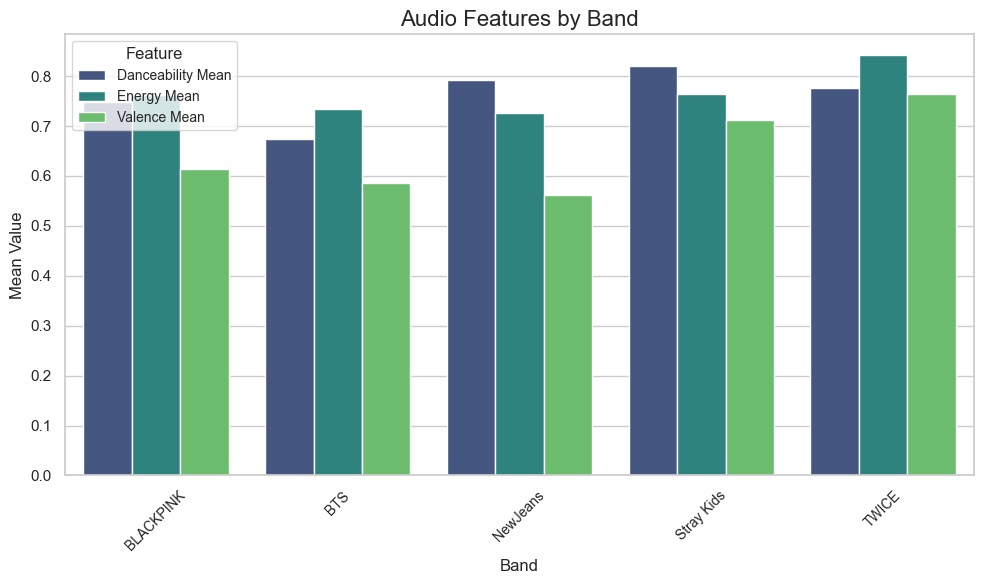

In [45]:
#  Evidence
# Bar chart for other features by Band
plt.figure(figsize=(10, 6))
sns.barplot(data=kpop_audio_melted, x='Band', y='Value', hue='Feature', palette='viridis')
plt.title('Audio Features by Band', fontsize=16)
plt.xlabel('Band', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Feature', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


### 3: Chart Dominance Reflects Strategic Positioning

BTS has consistently led in chart performance over the years, peaking with 9 charted songs in 2020, reflecting their prolific output and ability to sustain global relevance. BLACKPINK, with fewer but highly impactful releases, showcases a contrasting strategy that prioritizes quality and global appeal. Emerging bands like NewJeans and Stray Kids demonstrate the dynamic nature of the industry, where new entrants can quickly rise to prominence.
Evolving Musical Trends Highlight Adaptability:



In [46]:
# Evidence
# Step 1: Extract the year from the `chart_week`
result['chart_year'] = pd.to_datetime(result['chart_week']).dt.year

# Step 2: Group by artist and chart year, and count unique songs
songs_per_year = (
    result.groupby(['name_artist', 'chart_year'])['name_track']
    .nunique()
    .reset_index(name='song_count')  # Add a column for song count
)

# Step 3: Display the result
songs_per_year

/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_38403/1983379572.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name_artist,chart_year,song_count
0,BLACKPINK,2018,2
1,BLACKPINK,2019,1
2,BLACKPINK,2020,4
3,BLACKPINK,2022,2
4,BTS,2017,2
5,BTS,2018,4
6,BTS,2019,2
7,BTS,2020,9
8,BTS,2021,5
9,BTS,2022,4


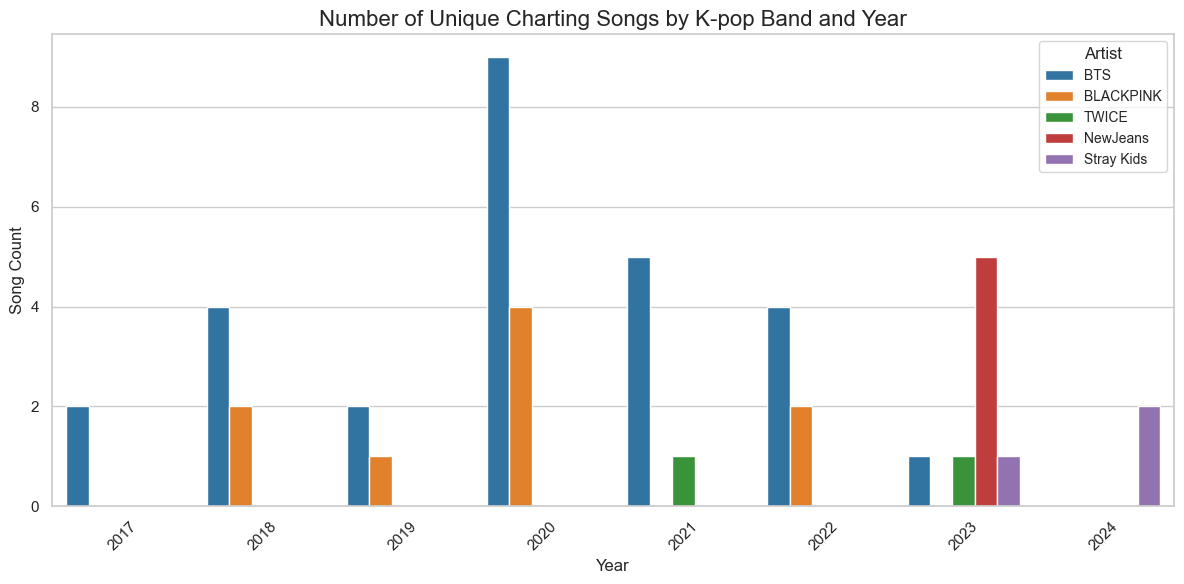

In [47]:
#  Evidence
# Bar chart to show song count per year for each artist
plt.figure(figsize=(12, 6))
sns.barplot(data=songs_per_year, x='chart_year', y='song_count', hue='name_artist', palette='tab10')
plt.title('Number of Unique Charting Songs by K-pop Band and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Song Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Artist', fontsize=10)
plt.tight_layout()
plt.show()

Audio features such as danceability and energy have evolved, with bands like BTS and BLACKPINK shifting toward more diverse and introspective compositions in recent years. This adaptability in style allows them to appeal to a broader audience while exploring new creative directions.

   chart_year  danceability    energy  loudness   valence       tempo
0        2018      0.674667  0.762000 -4.470000  0.559667  113.277333
1        2019      0.763000  0.835000 -5.234000  0.645000  131.875000
2        2020      0.779391  0.755348 -4.036565  0.814609  149.038348
3        2022      0.803333  0.699333 -6.474667  0.703667   96.706000


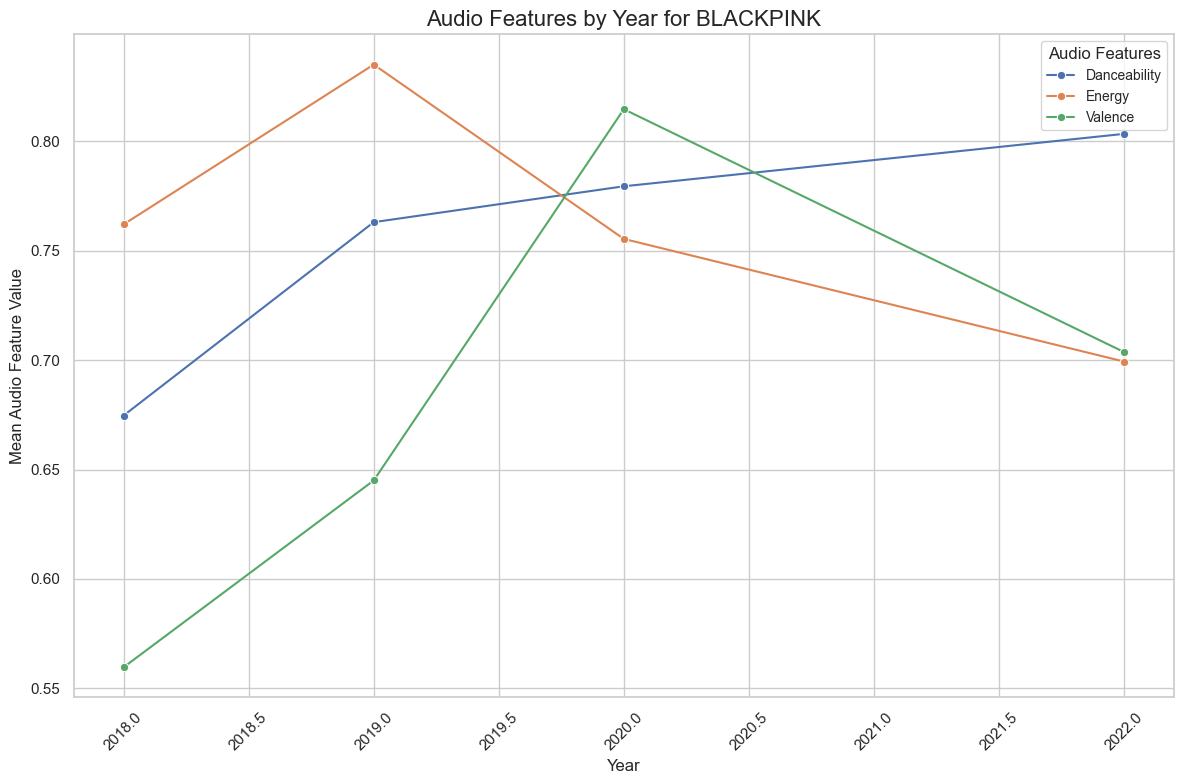

   chart_year  danceability    energy  loudness   valence       tempo
0        2017      0.608000  0.820692 -4.228923  0.662154  157.577154
1        2018      0.623250  0.811312 -4.206875  0.540250  139.749437
2        2019      0.632600  0.825600 -5.370600  0.711000  115.471200
3        2020      0.731000  0.737133 -4.493067  0.693267  116.547787
4        2021      0.739632  0.697158 -4.314763  0.727987  118.001461
5        2022      0.843522  0.662246 -4.521957  0.768928  106.894783
6        2023      0.617000  0.589000 -5.978000  0.566000   92.991000


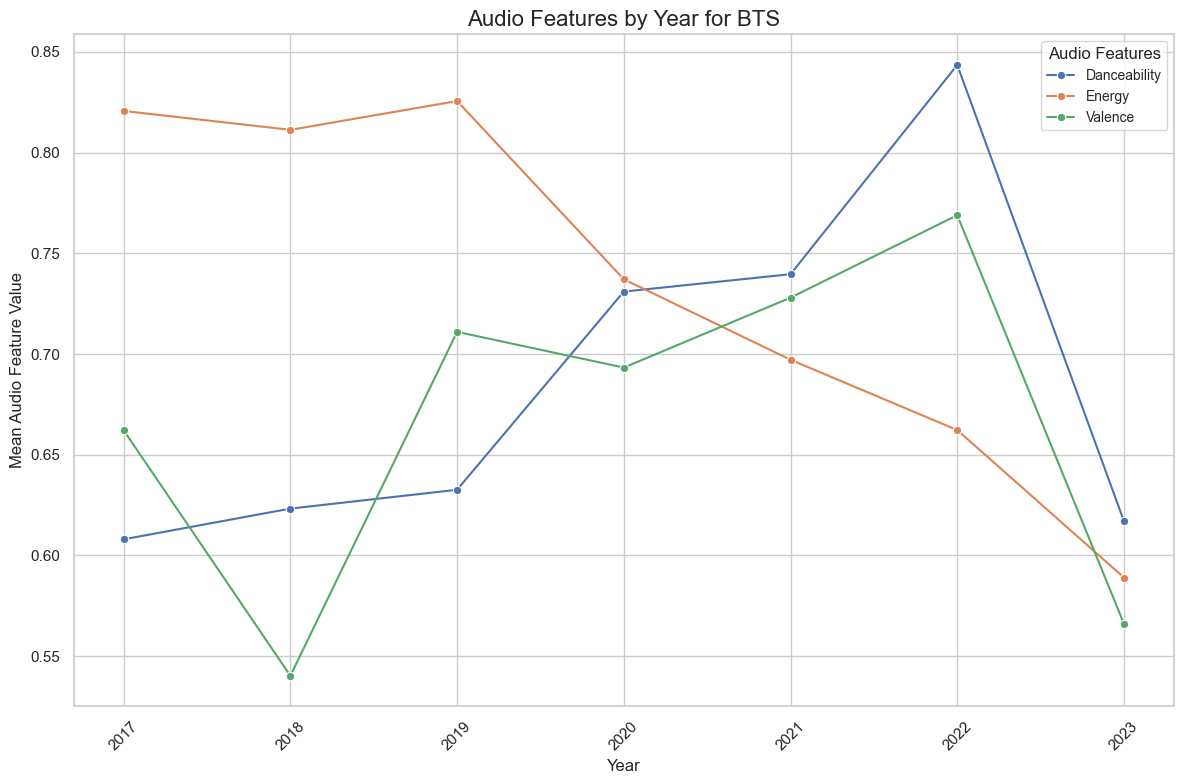

In [48]:
#Evidence 
# Example usage of the function
band_name = 'BLACKPINK'  # Example band name
audio_features_by_year_result = analyze_audio_features_by_band_and_year(result, tracks_audio_features, band_name)

# Example usage of the function
band_name = 'BTS'  # Example band name
audio_features_by_year_result = analyze_audio_features_by_band_and_year(result, tracks_audio_features, band_name)

### 4: BTS’s Chart Dominance

BTS's consistent presence at the top of global charts highlights their unparalleled global influence. Tracks like "Butter", which held the #1 position for 10 weeks, and "Dynamite", which stayed at #1 for 3 weeks, demonstrate their ability to create long-lasting, chart-topping hits.



In [49]:
#Evidence 
top_tracks_chart


,index,name_track,name_artist,list_position,Most Weeks at Chart Position 1
0,100,Life Goes On,BTS,1,1
1,36,Dynamite,BTS,1,3
2,125,Permission to Dance,BTS,1,1
3,13,Butter,BTS,1,10


Audio Features Driving Success:

Danceability and Energy: Tracks maintain balanced scores (e.g., "Life Goes On" with danceability at 0.56 and energy at 0.72), appealing to both casual and active listeners.
Accessible Tempos: With a range between 80–140 BPM, the pacing makes the tracks engaging and versatile.
Loudness and Valence: Moderate loudness (~-5.7 dB) and varying emotional tones enhance replayability and emotional connection with audiences.

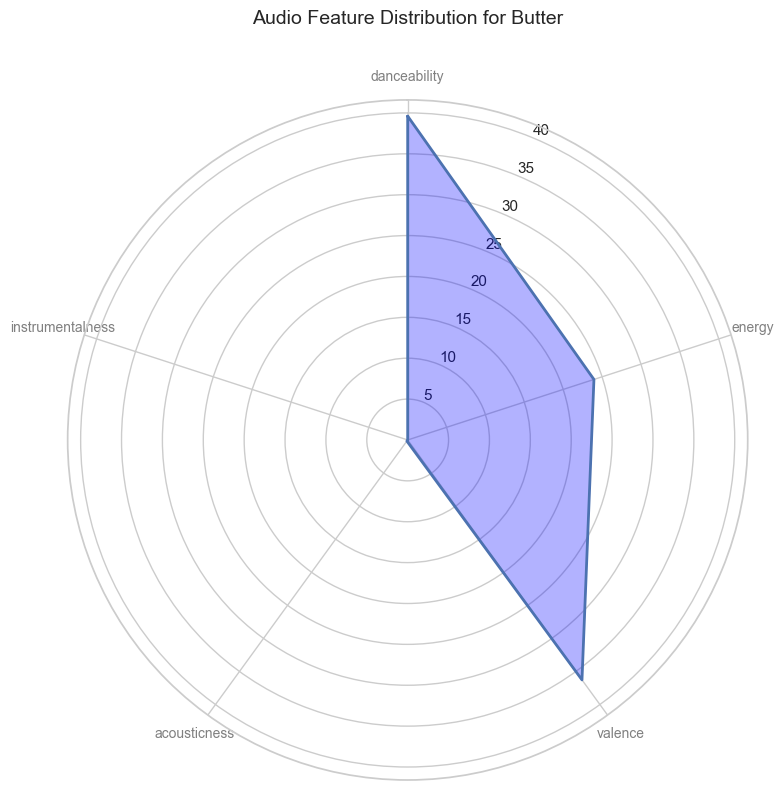

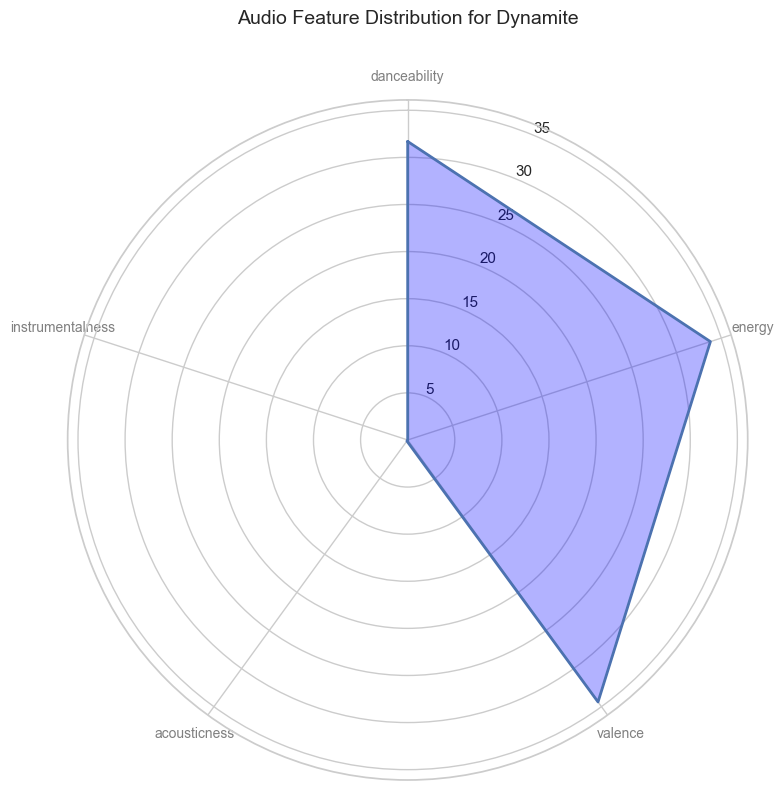

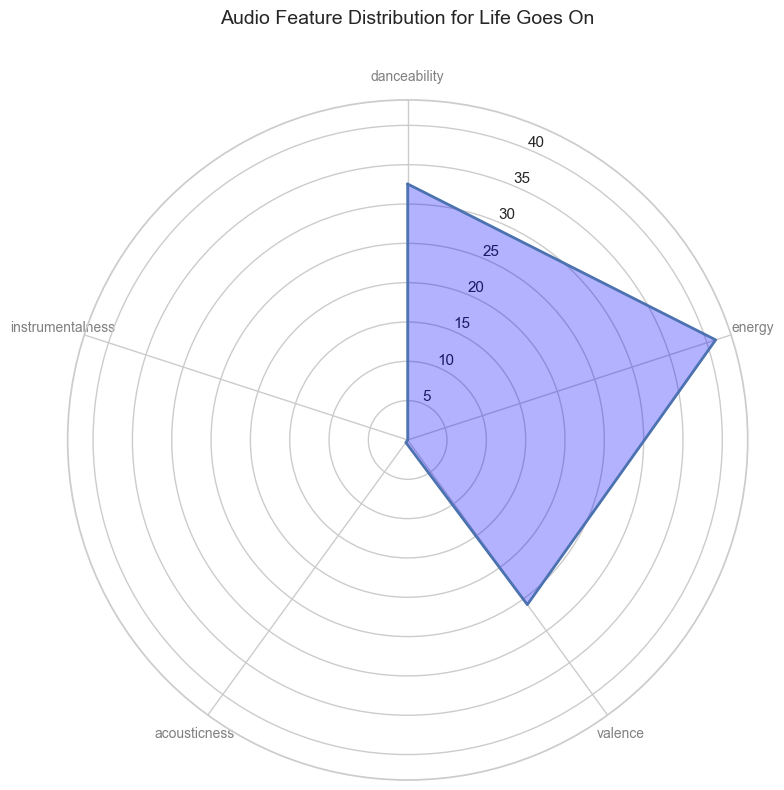

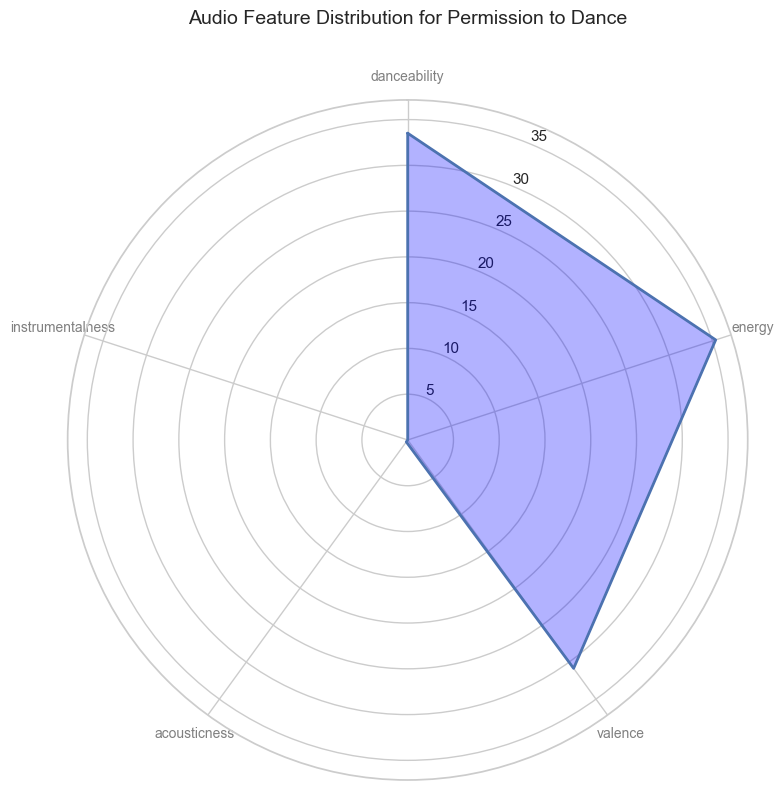

In [50]:
# Evidence 

# Audio Feature Analysis Without Tempo 
# List of audio features
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

# Normalize features to calculate percentages
top_tracks_with_features['total_features'] = top_tracks_with_features[audio_features].sum(axis=1)
for feature in audio_features:
    top_tracks_with_features[feature + '_percentage'] = (top_tracks_with_features[feature] / top_tracks_with_features['total_features']) * 100

# Generate radar charts for each song
for track_name, track_data in top_tracks_with_features.groupby('name_track'):
    # Extract percentages for the current song
    feature_percentages = track_data.iloc[0][[f + '_percentage' for f in audio_features]].values
    feature_labels = audio_features

    # Prepare data for the radar chart
    values = list(feature_percentages) + [feature_percentages[0]]  # Close the loop
    angles = [n / float(len(feature_labels)) * 2 * pi for n in range(len(feature_labels))]
    angles += angles[:1]  # Complete the circle

    # Plot the radar chart
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)  # Start from the top
    ax.set_theta_direction(-1)  # Clockwise direction

    # Draw one line per feature and fill the area
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=track_name)
    ax.fill(angles, values, color='blue', alpha=0.3)

    # Add labels
    plt.xticks(angles[:-1], feature_labels, color='grey', size=10)

    # Add title
    plt.title(f"Audio Feature Distribution for {track_name}", size=14, y=1.1)
    plt.tight_layout()
    plt.show()

### 5: Chart Performance Highlights Global Reach:

Jung Kook has dominated charts with multiple tracks reaching #1, including "Seven" and "3D," reflecting his ability to appeal to a global audience.

Jimin secures strong chart positions with tracks like "Like Crazy" and "Angel Pt. 1," further demonstrating his solo influence.
Focus on Individual Artistic Identity:

V, RM, and Agust D release fewer tracks but emphasize quality and artistic diversity, with standout songs like "Slow Dancing" (V), "Wild Flower" (RM), and "Daechwita" (Agust D).
Their distinctive styles showcase the versatility of BTS members, enabling them to cater to different audience preferences while maintaining their individual brands.

Impact on BTS’s Legacy:
The success of solo tracks reinforces BTS’s global reputation as a group of multi-talented artists, diversifying revenue streams and expanding their reach across global markets. Their ability to balance creative expression with commercial appeal strengthens their individual and collective impact.

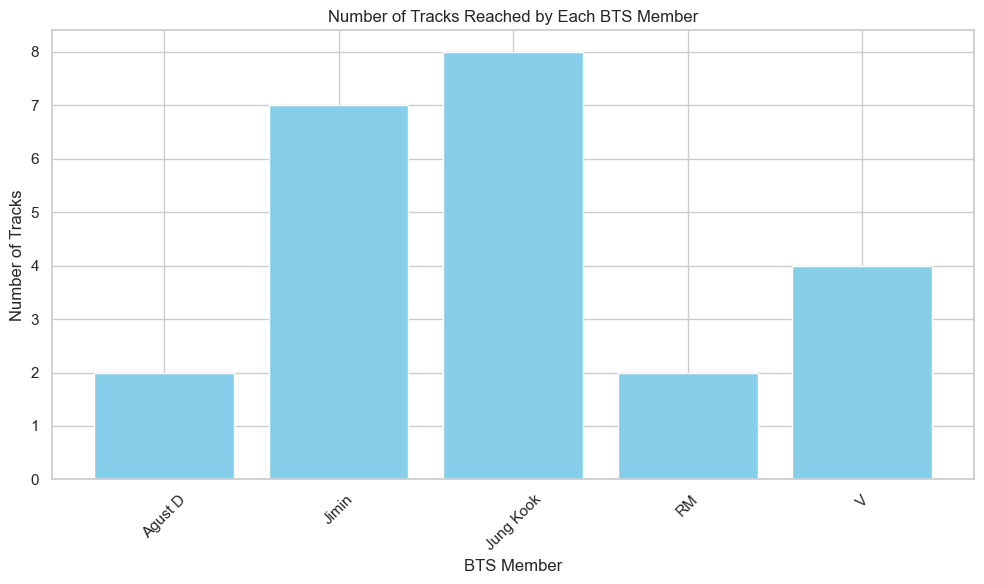

In [51]:
# Evidence 1
# Step 5: Create the bar chart to visualize the number of tracks per BTS member
plt.figure(figsize=(10, 6))
plt.bar(track_count['name_artist'], track_count['Track Count'], color='skyblue')
plt.xlabel('BTS Member')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks Reached by Each BTS Member')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6 : Dominance in Western Markets:

All analyzed K-pop bands, including BTS and BLACKPINK, exhibit strong trends in the US and UK markets, reflecting their ability to resonate with Western audiences through globalized music styles and marketing strategies.
Japan as a Core Market for K-pop:

BTS shows exceptional dominance in Japan, with all 25 tracks trending, underscoring their unparalleled popularity in the region.
BLACKPINK, though trending with only 2 tracks, demonstrates a selective but influential impact in the Japanese market, leveraging their global star power.
Limited Access to China:

No observable trends for K-pop artists in China suggest regulatory barriers and limited access to platforms as challenges in penetrating this market.

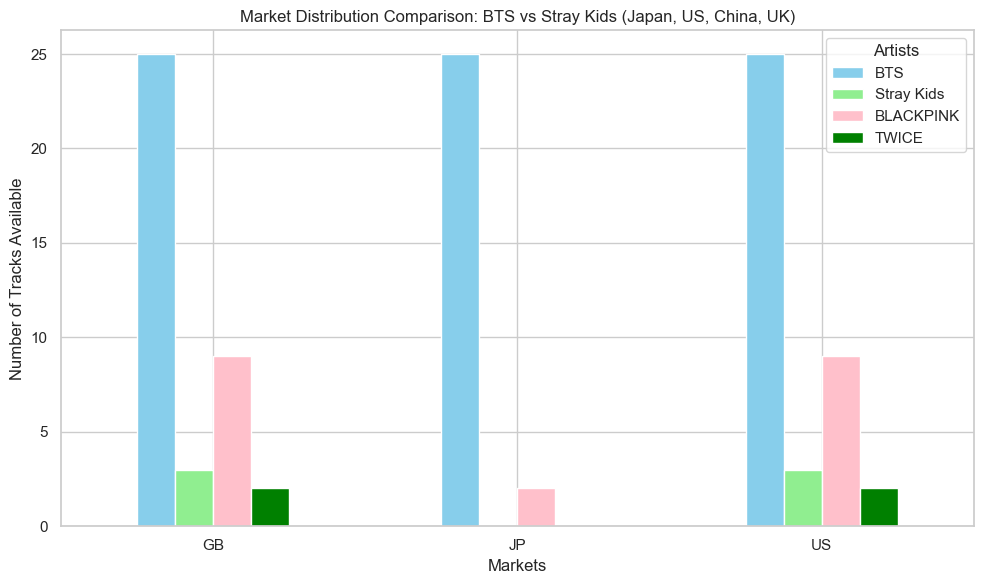

In [52]:
# Evidence 
# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen','pink','green'])
plt.title('Market Distribution Comparison: BTS vs Stray Kids (Japan, US, China, UK)')
plt.xlabel('Markets')
plt.ylabel('Number of Tracks Available')
plt.xticks(rotation=0)
plt.legend(title='Artists')
plt.tight_layout()
plt.show()



###  Overall Key Takeaways for Music Producers

1- Audience-Centric Music Production:
Tailor tracks to global trends while maintaining authenticity to ensure widespread appeal and strong fan engagement.

2- Strategic Market Focus:
Invest in targeted marketing strategies for high-potential regions like the US, UK, and Japan, while monitoring emerging markets for opportunities.

3- Balanced Release Strategies:
Decide between high-volume content output (like BTS) and selective impactful releases (like BLACKPINK) based on audience preferences and competitive positioning.

4- Leverage Solo and Group Synergies:
Support solo projects to build individual branding and expand the group’s reach, while leveraging the collective influence of the group for maximum market impact.